In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage import filters
import os
os.sys.path.append('../')

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
from functools import reduce


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [76]:
mouse = '4222153.1'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df_mouse = df_mouse[df_mouse['Track'].str.contains(tracks,regex=True)]
df_mouse

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1724  4222153.1  08_04_2019              1  TwoTower_foraging          120   
1747  4222153.1  10_04_2019              2  TwoTower_foraging           92   
1768  4222153.1  12_04_2019              2  TwoTower_foraging           82   
1794  4222153.1  14_04_2019              2  TwoTower_foraging           82   
1803  4222153.1  15_04_2019              2  TwoTower_foraging           74   

      Imaging ImagingRegion   DateTime  \
1724        1           CA1 2019-04-08   
1747        1           CA1 2019-04-10   
1768        1           CA1 2019-04-12   
1794        1           CA1 2019-04-14   
1803        1           CA1 2019-04-15   

                                              data file scanfile  \
1724  G:\My Drive\VR_Data\TwoTower\4222153.1\08_04_2...     None   
1747  G:\My Drive\VR_Data\TwoTower\4222153.1\10_04_2...     None   
1768  G:\My Drive\VR_Data\TwoTower\4222153.1\12_04_2...     None   
1794  G:\My Drive\VR_Data\TwoTower\4222153.1\14_04_2...     None   
1803  G:\My Drive\VR_Data\TwoTower\4222153.1\15_04_2...     None   

                                                scanmat  \
1724  G:\My Drive\2P_Data\TwoTower\4222153.1\08_04_2...   
1747  G:\My Drive\2P_Data\TwoTower\4222153.1\10_04_2...   
1768  G:\My Drive\2P_Data\TwoTower\4222153.1\12_04_2...   
1794  G:\My Drive\2P_Data\TwoTower\4222153.1\14_04_2...   
1803  G:\My Drive\2P_Data\TwoTower\4222153.1\15_04_2...   

                                              s2pfolder  
1724  G:\My Drive\2P_Data\TwoTower\4222153.1\08_04_2...  
1747  G:\My Drive\2P_Data\TwoTower\4222153.1\10_04_2...  
1768  G:\My Drive\2P_Data\TwoTower\4222153.1\12_04_2...  
1794  G:\My Drive\2P_Data\TwoTower\4222153.1\14_04_2...  
1803  G:\My Drive\2P_Data\TwoTower\4222153.1\15_04_2...

In [77]:
sess = df_mouse.iloc[-2]
VRDat,C,S,A = pp.load_scan_sess(sess,analysis='s2p',fneu_coeff=.7)

num aberrant ttls 0.0
33253 (33253,) (33253, 21) 109955
frame diff 0


In [78]:
print(S.shape)

(33253, 659)


In [79]:
# C = u.df(C)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,VRDat.tstart._values,VRDat.teleport._values,bin_size=10)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
effmorph = trial_info['morphs']+trial_info['towerJitter']+trial_info['bckgndJitter']
effmorph_s = np.sort(effmorph)
morph_sort = np.argsort(effmorph)

In [73]:
print(S_trial_mat.shape)

(90, 45, 531)


In [29]:
import pickle
fname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\PlaceCells\\S",
                     mouse,"%s_%s_%d_results.pkl" % (mouse,sess['DateFolder'],sess['SessionNumber']))
with open(fname,"rb") as f:
    res= pickle.load(f)
    

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\My Drive\\Figures\\TwoTower\\PlaceCells\\S\\4222154.1\\4222154.1_15_04_2019_2_results.pkl'

In [9]:
# SI = res['SI'][0]['all']+res['SI'][1]['all']
# order = np.argsort(SI)[::-1]

NameError: name 'res' is not defined

In [8]:
print(res.keys())

dict_keys(['FR', 'masks', 'SI'])


num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
frame diff 0
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
morph 0 place cells = 183 out of 531 , 0.344633 
morph 1 place cells = 211 out of 531, 0.397363
common place cells = 86


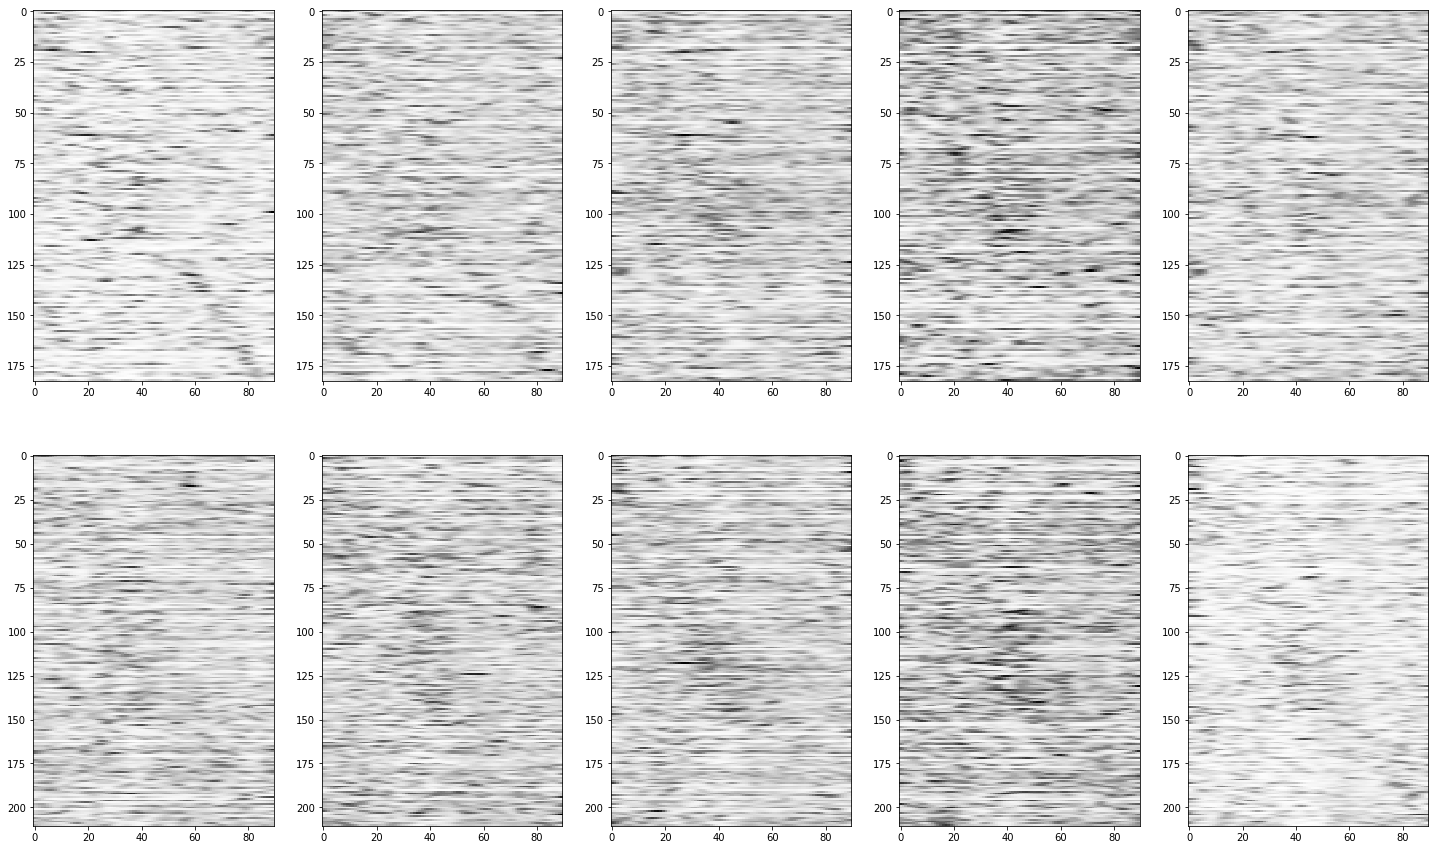

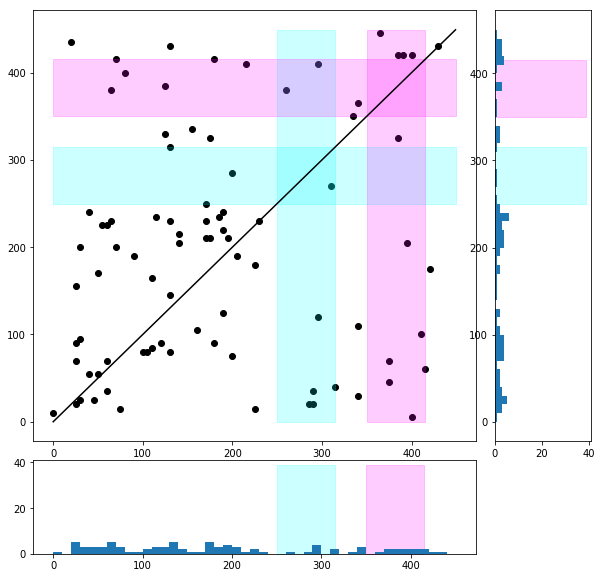

In [74]:
FR, masks, SI = pc.single_session(sess,savefigs=False,
                                            deconv=True, win_trial_perm=True,
                                            cell_method='s2p',method='bootstrap',
                                             morphlist=[0,.25,.5,.75,1])

num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
frame diff 0
(531, 90) (90, 531)
(531, 180) (90, 531)
(531, 270) (90, 531)
(531, 360) (90, 531)


(array([[1.        , 0.9975249 , 0.98007068, ..., 0.47943506, 0.48466545,
         0.48452323],
        [0.9975249 , 1.        , 0.99157666, ..., 0.48695317, 0.49166782,
         0.4912453 ],
        [0.98007068, 0.99157666, 1.        , ..., 0.49554266, 0.49914574,
         0.4981632 ],
        ...,
        [0.47943506, 0.48695317, 0.49554266, ..., 1.        , 0.99107284,
         0.97903034],
        [0.48466545, 0.49166782, 0.49914574, ..., 0.99107284, 1.        ,
         0.99743684],
        [0.48452323, 0.4912453 , 0.4981632 , ..., 0.97903034, 0.99743684,
         1.        ]]),
 array([[1.        , 0.62986931, 0.55982646, 0.51297583, 0.48512534],
        [0.62986931, 1.        , 0.65507508, 0.58495497, 0.555827  ],
        [0.55982646, 0.65507508, 1.        , 0.71261348, 0.68252537],
        [0.51297583, 0.58495497, 0.71261348, 1.        , 0.67432899],
        [0.48512534, 0.555827  , 0.68252537, 0.67432899, 1.        ]]),
 (<Figure size 720x720 with 1 Axes>,
  <matplotlib.axes._

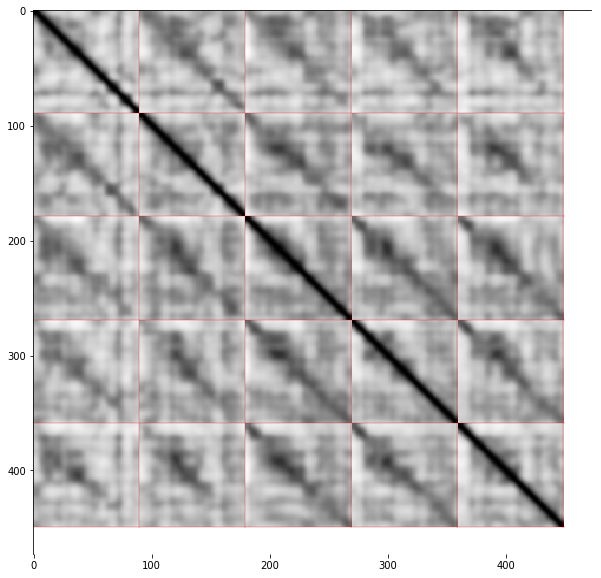

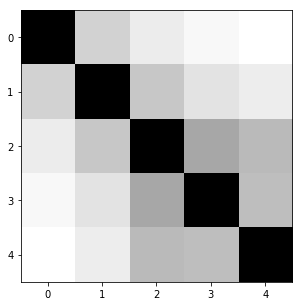

In [75]:
import SimilarityMatrixAnalysis as sm
sm.single_session(sess)

In [67]:
print(SI.keys())
SI_total = [SI[m]['all'] for m in [0,.25,.5,.75,1]]
SIt = SI_total[0]
for ind in SI_total[1:]:
    SIt+=ind

order = np.argsort(SIt)[::-1]

dict_keys([0, 0.25, 0.5, 0.75, 1])


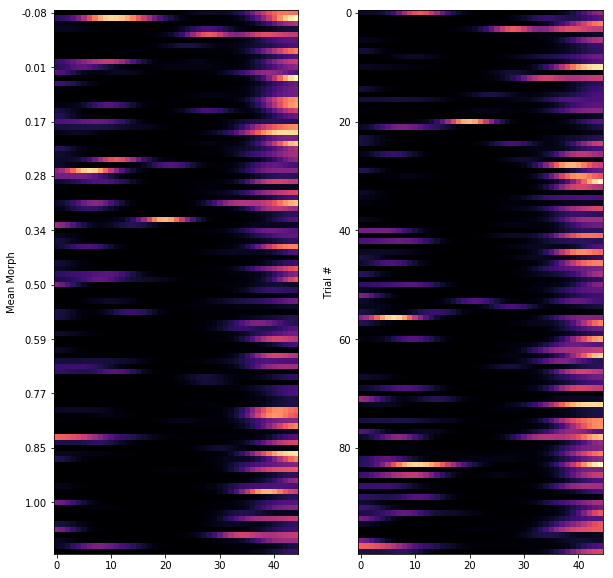

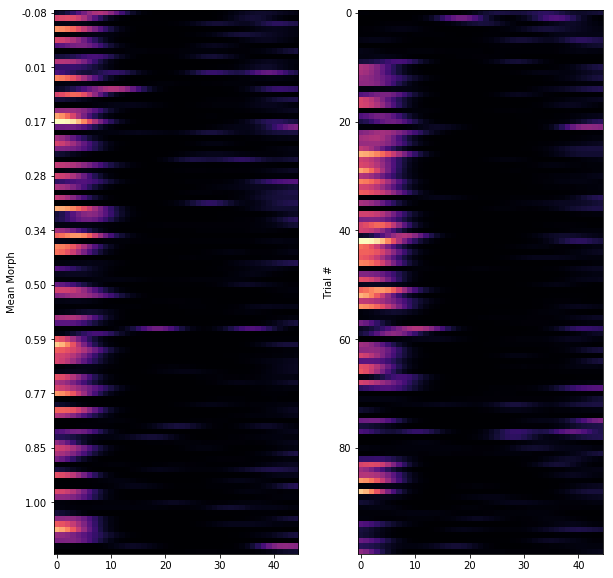

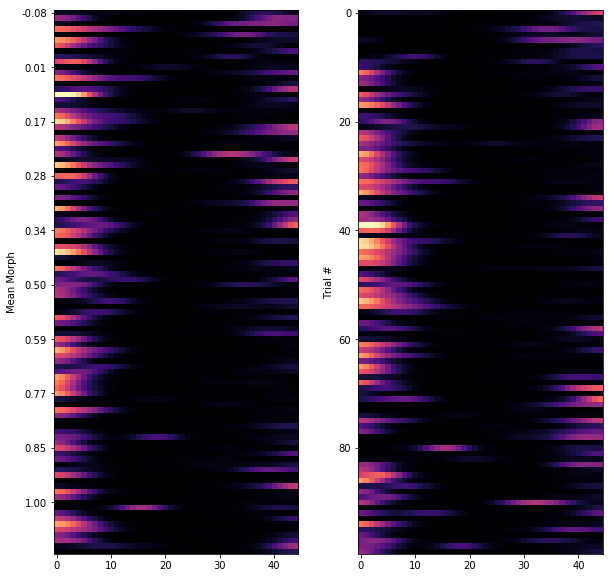

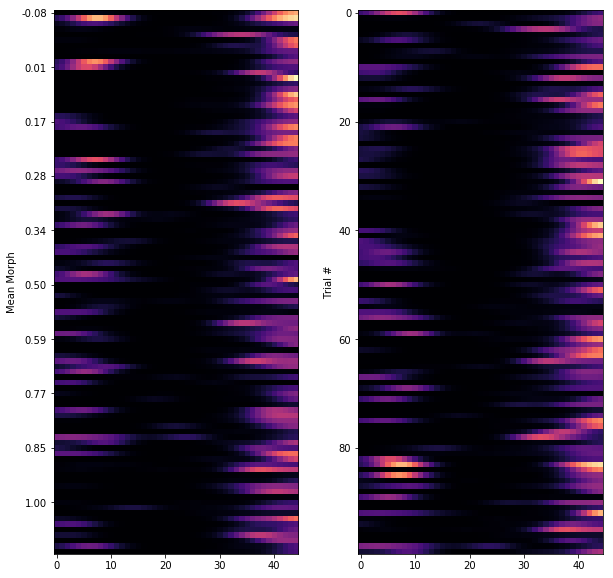

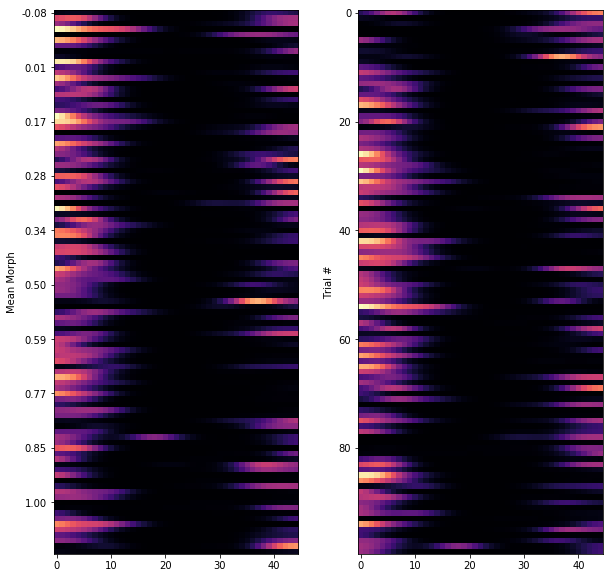

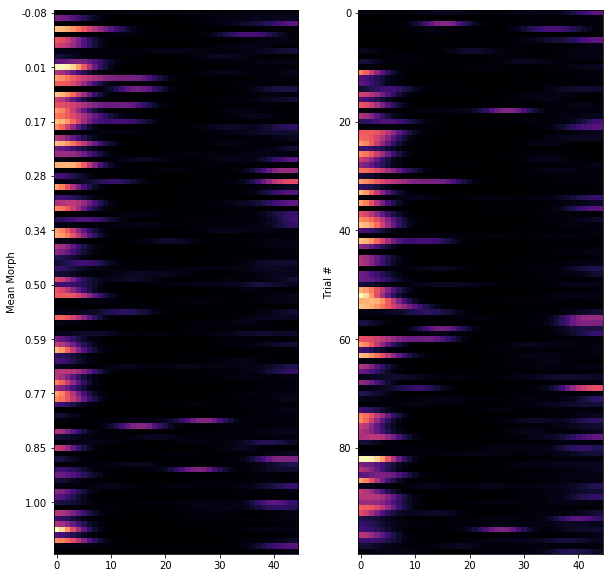

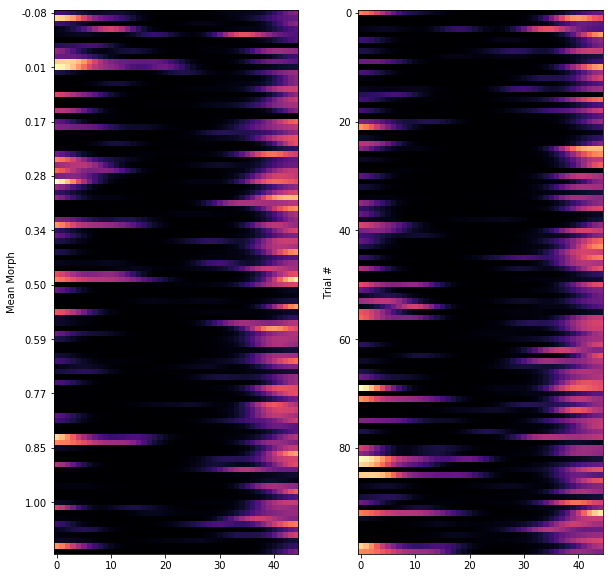

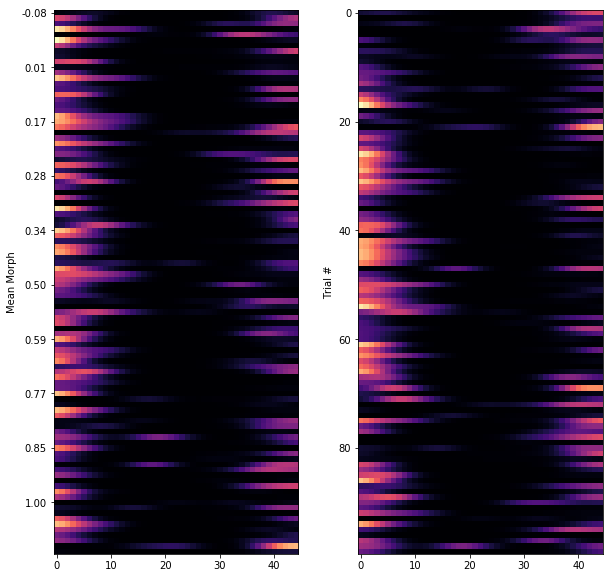

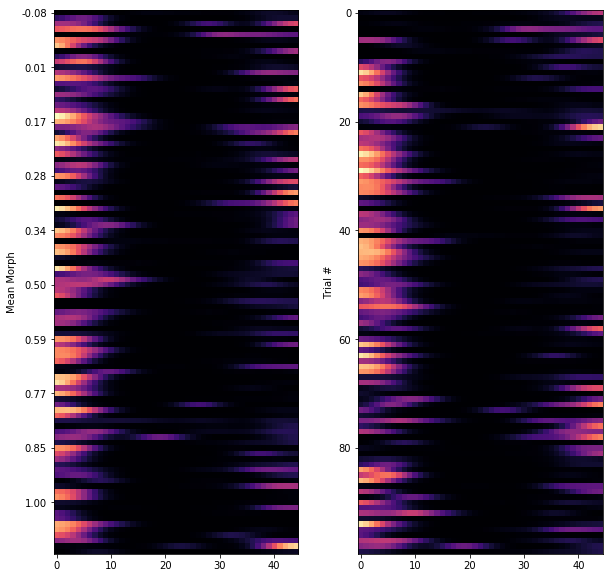

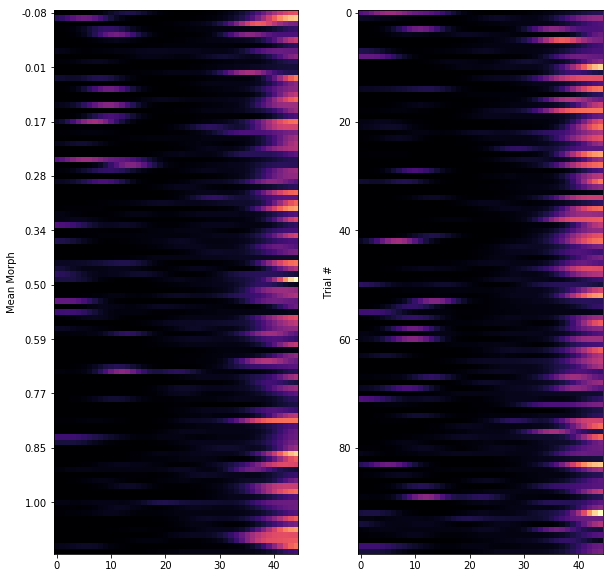

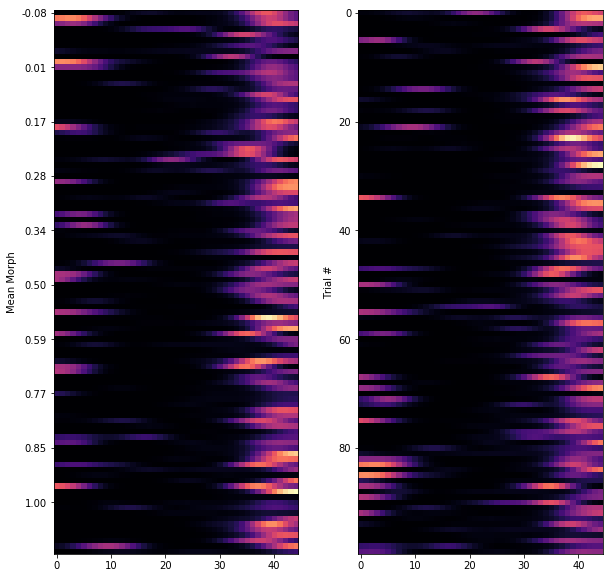

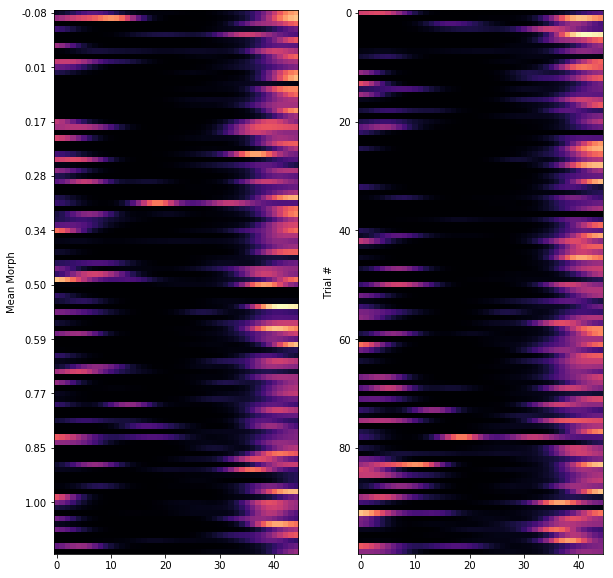

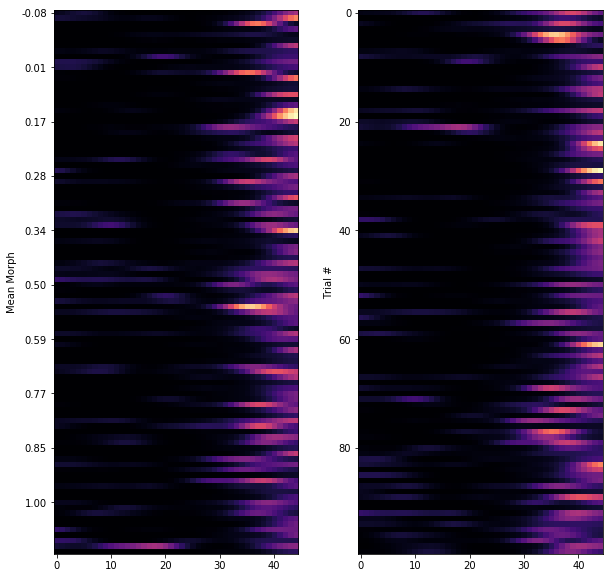

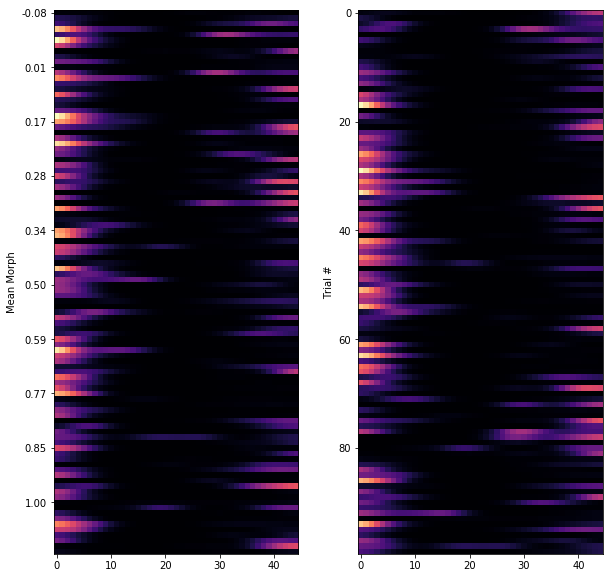

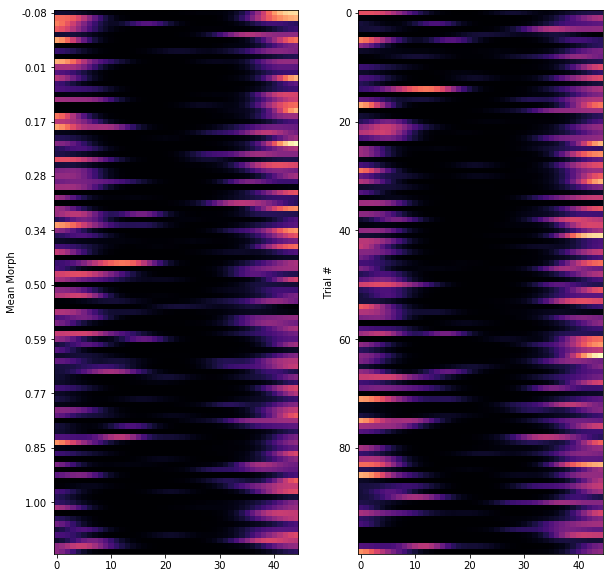

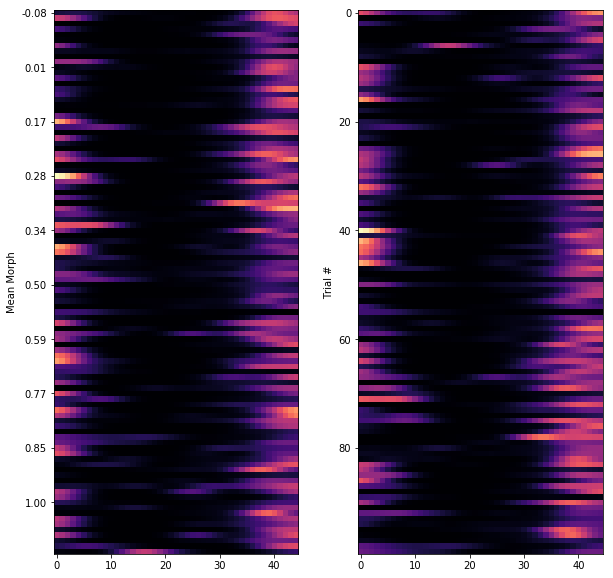

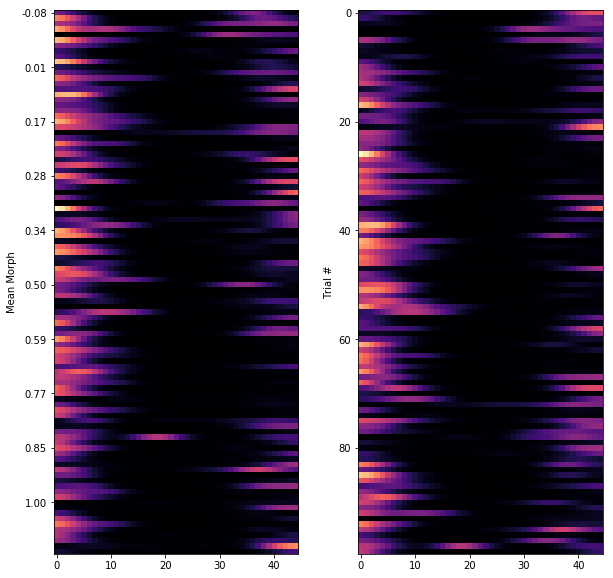

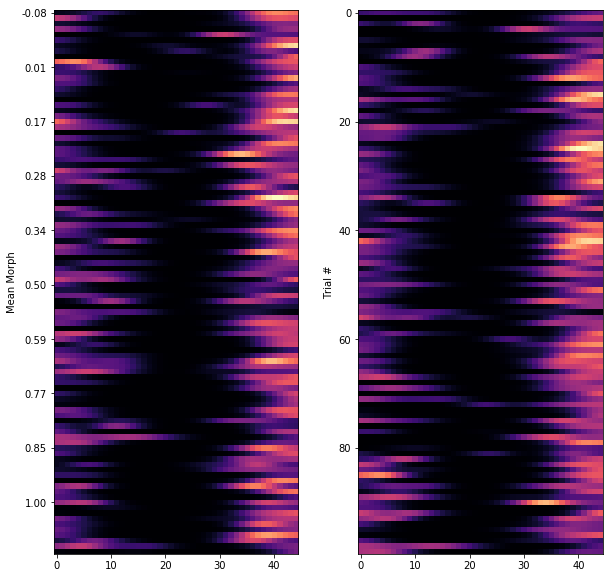

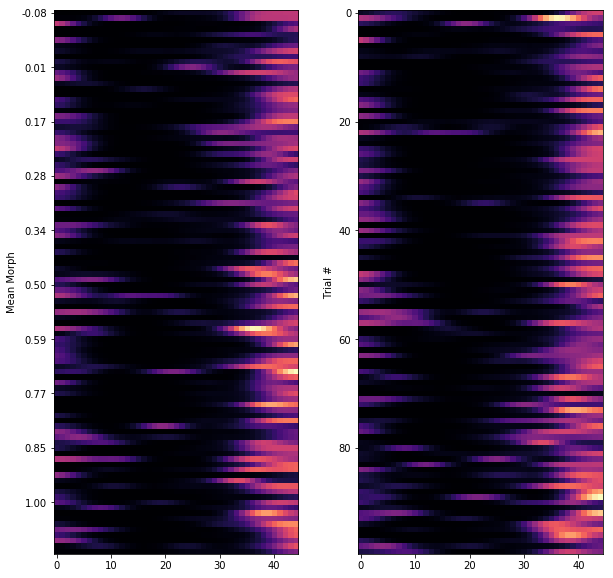

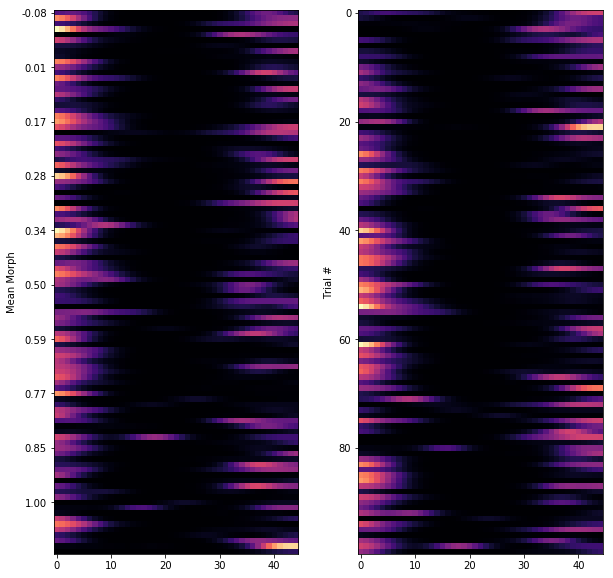

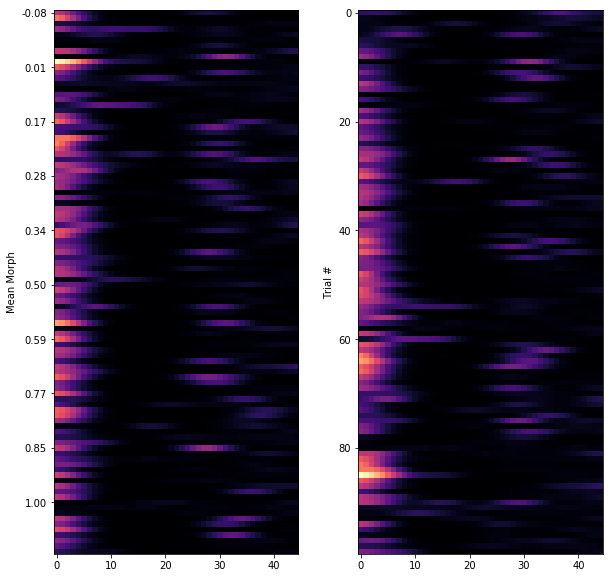

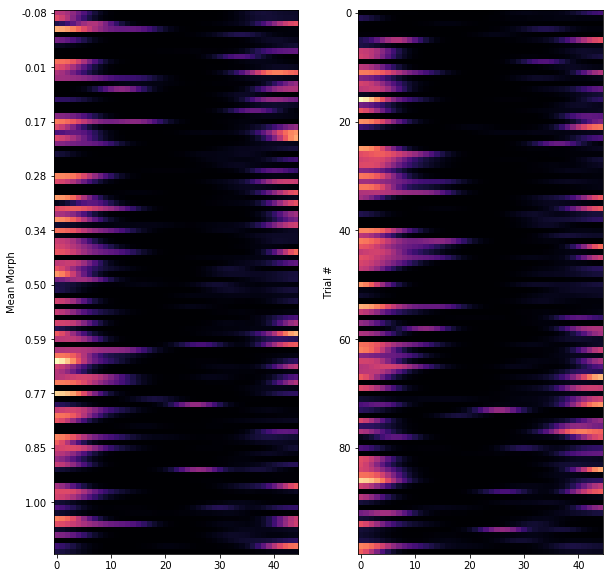

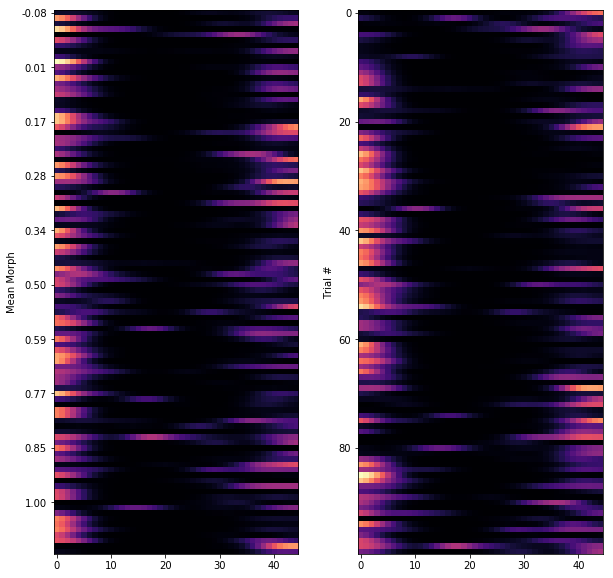

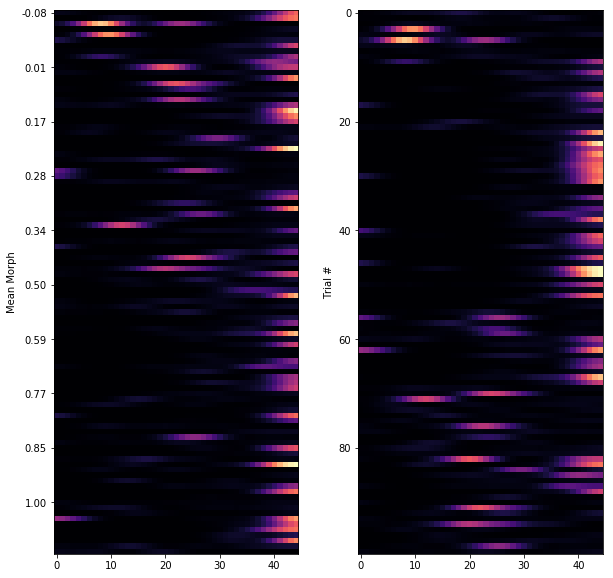

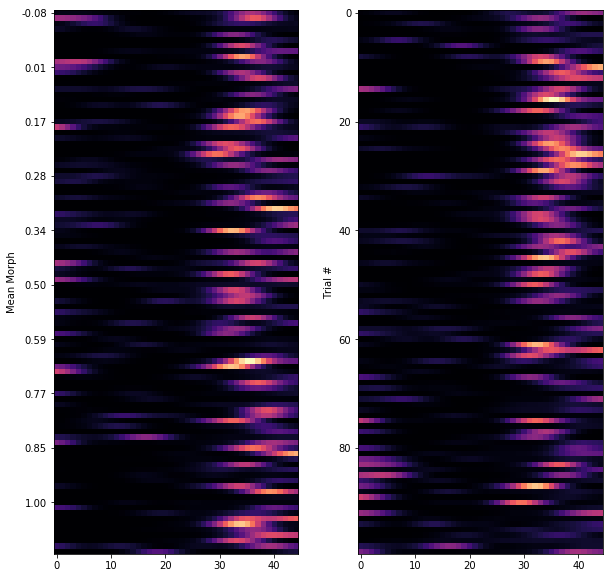

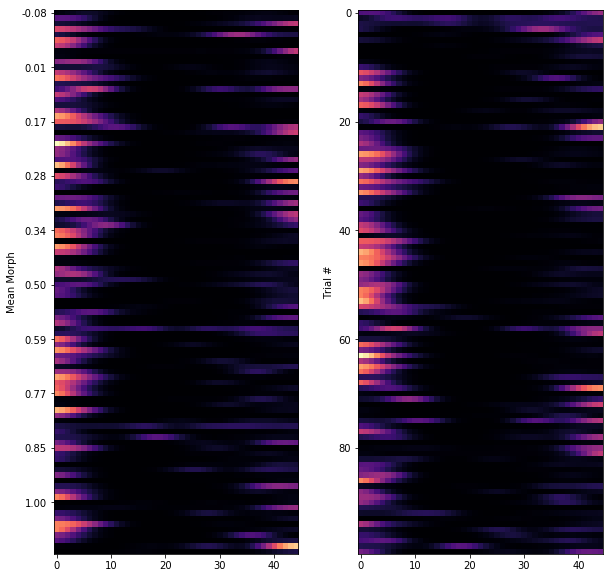

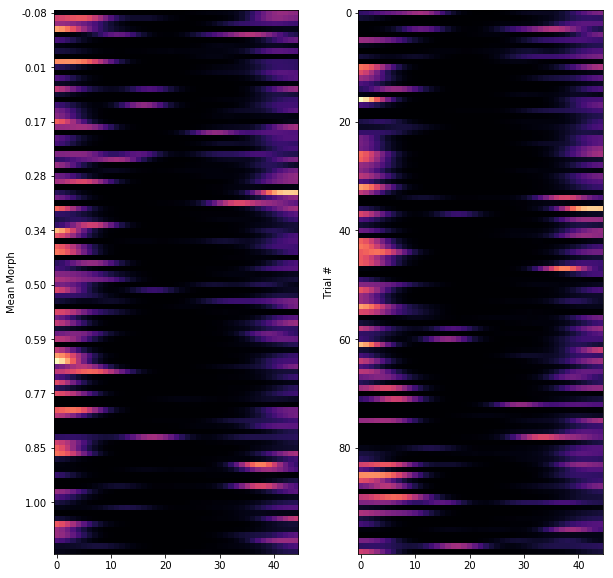

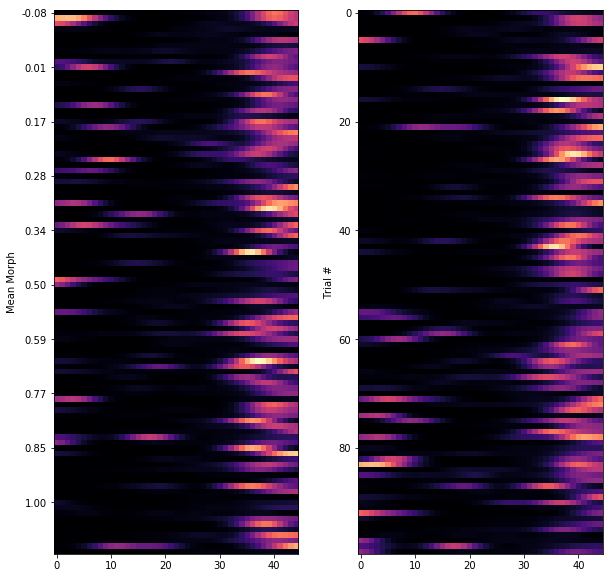

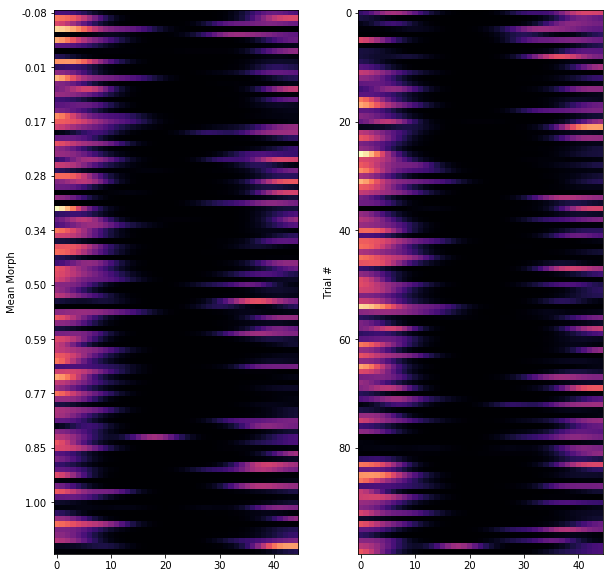

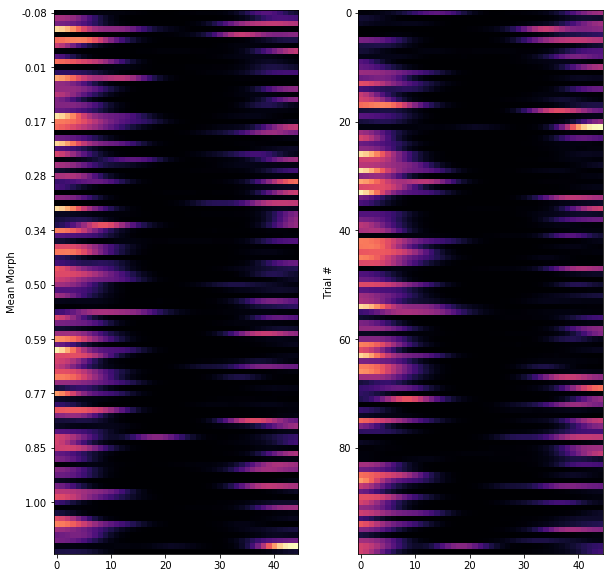

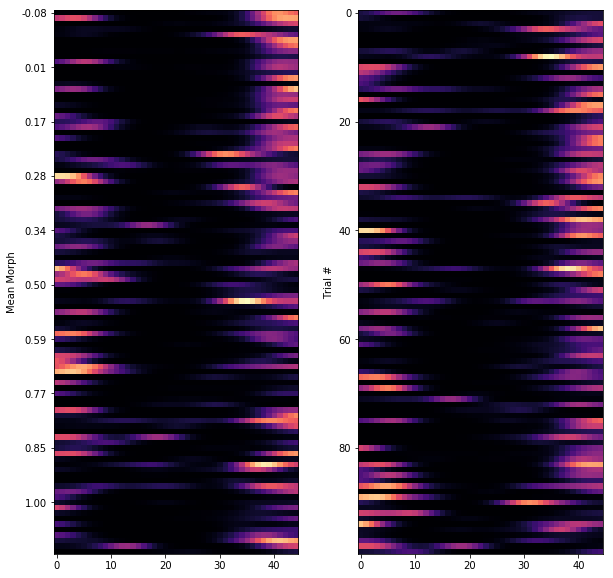

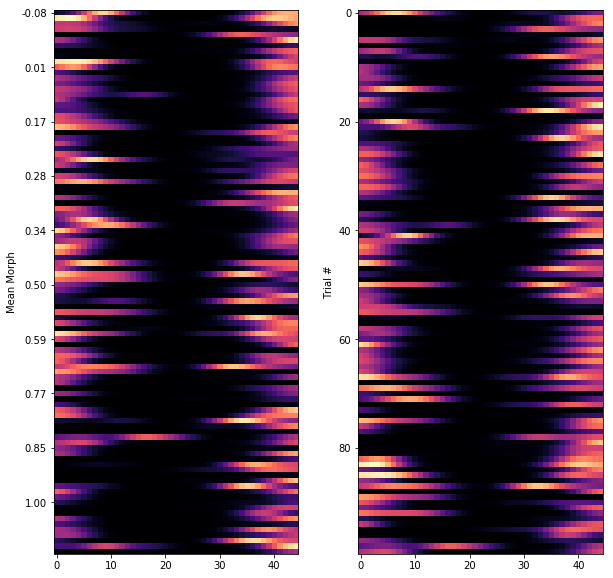

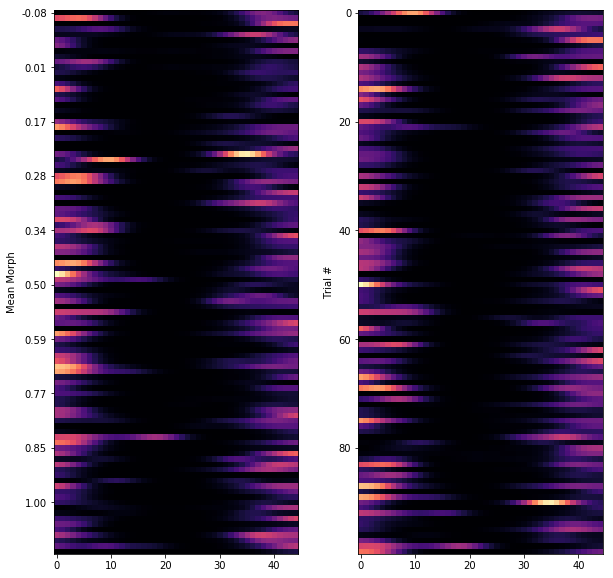

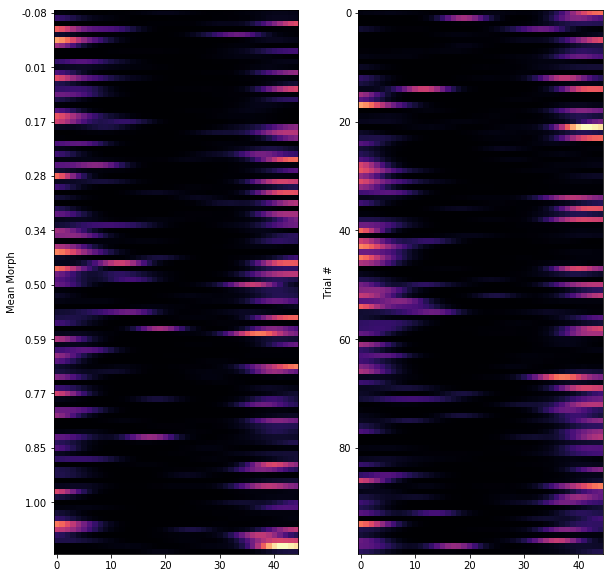

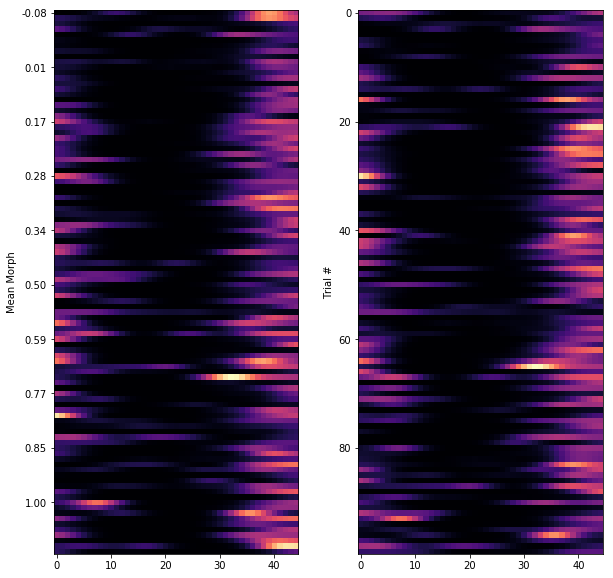

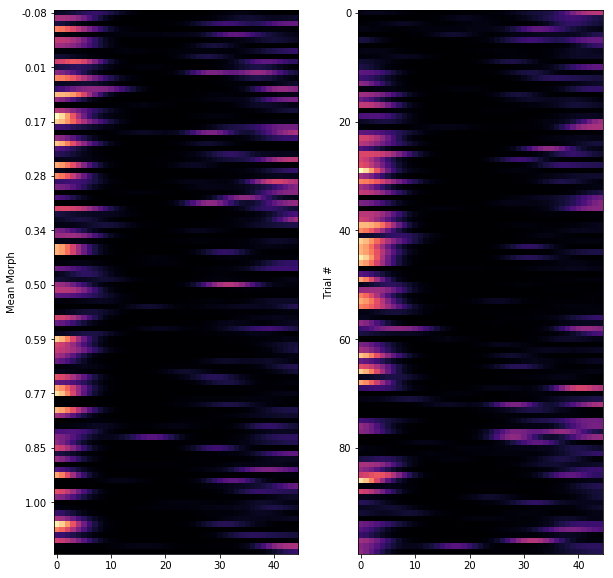

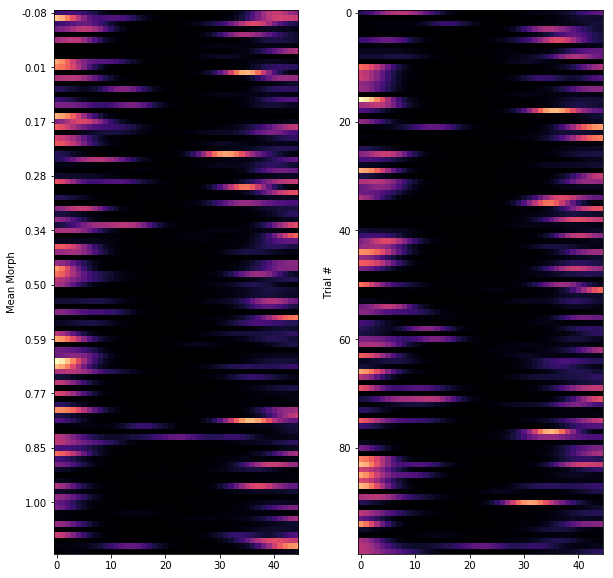

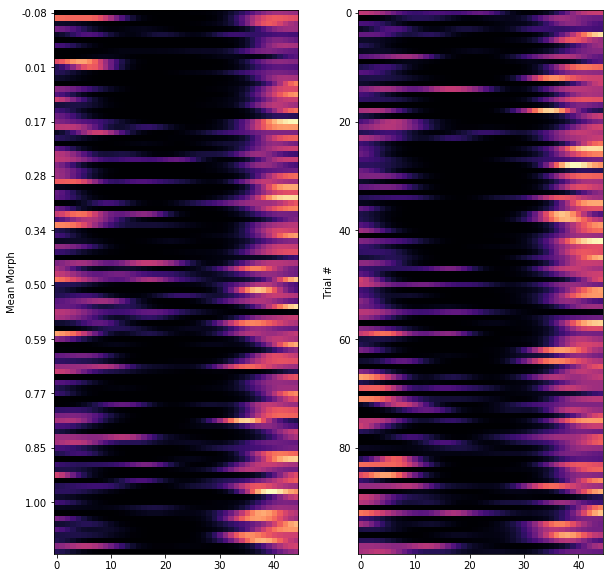

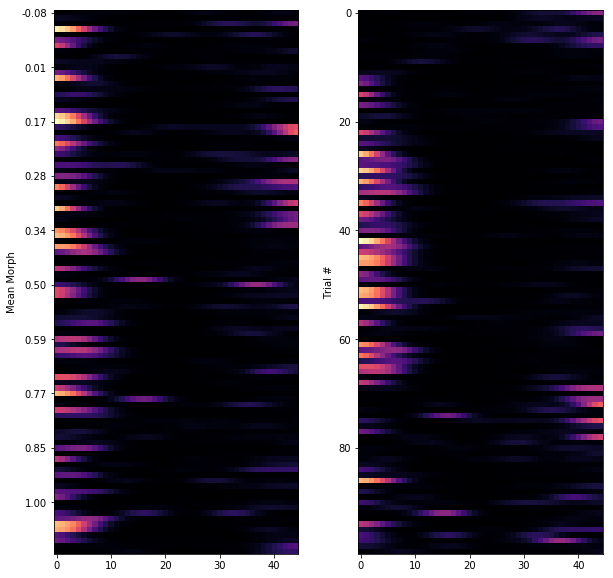

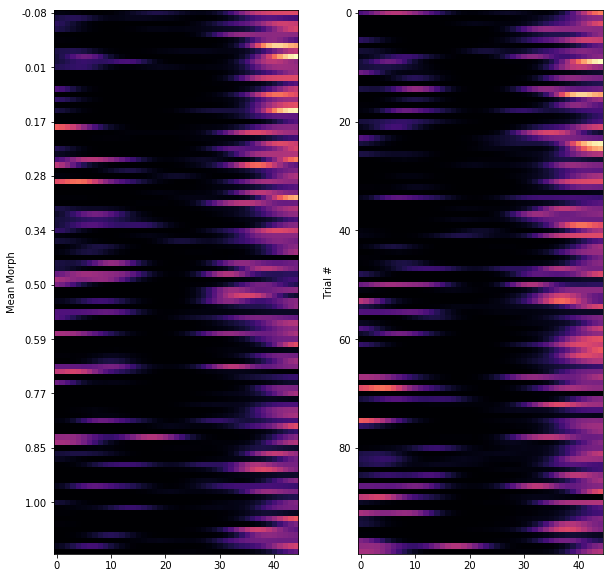

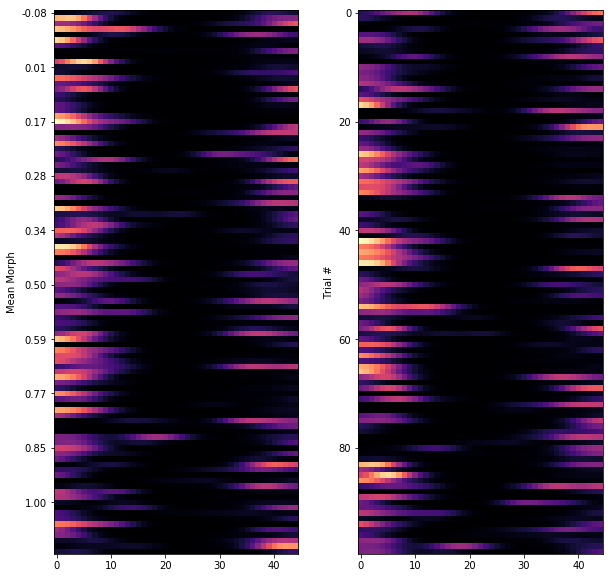

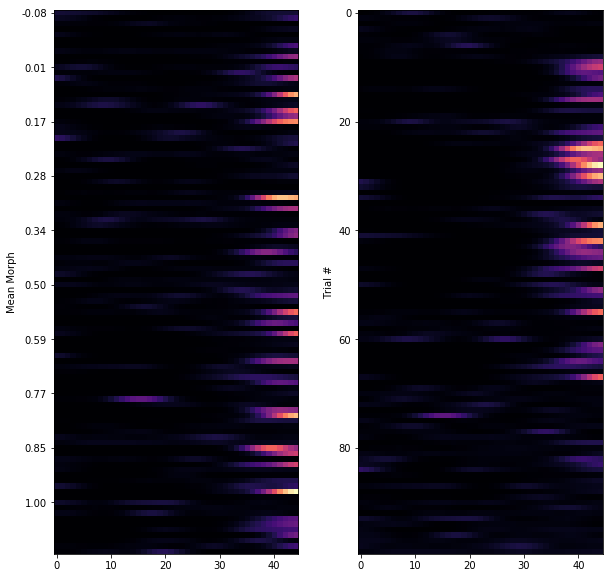

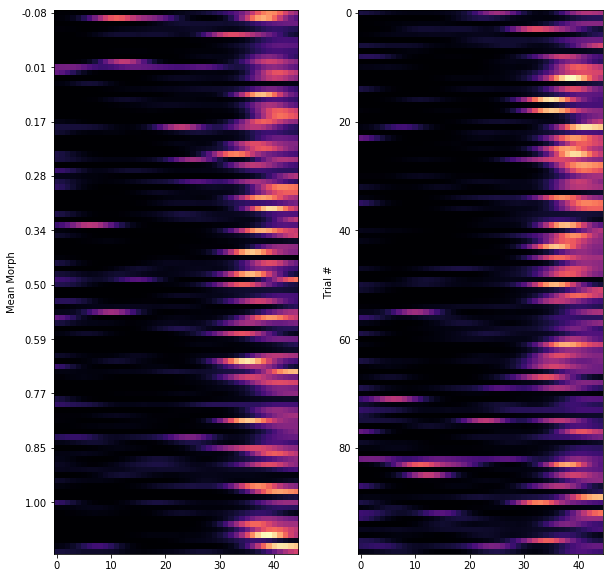

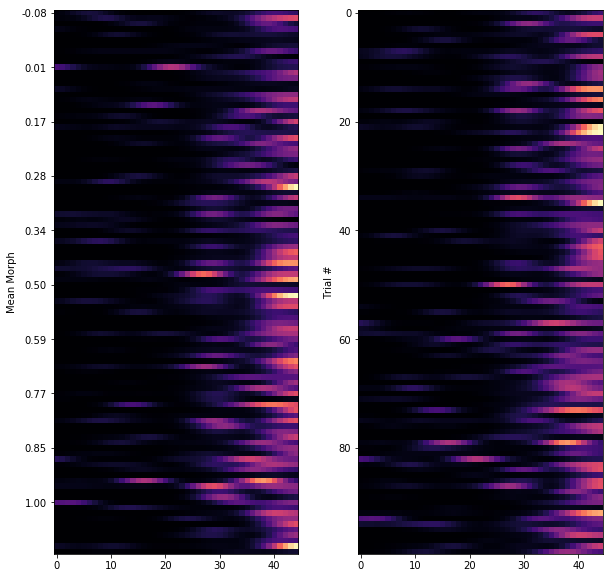

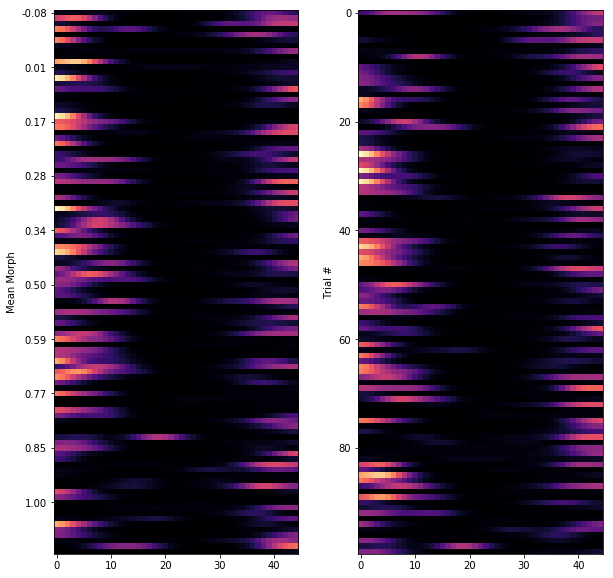

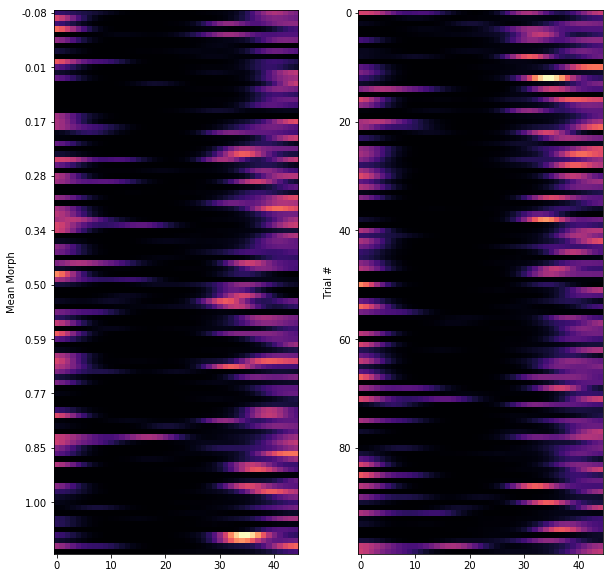

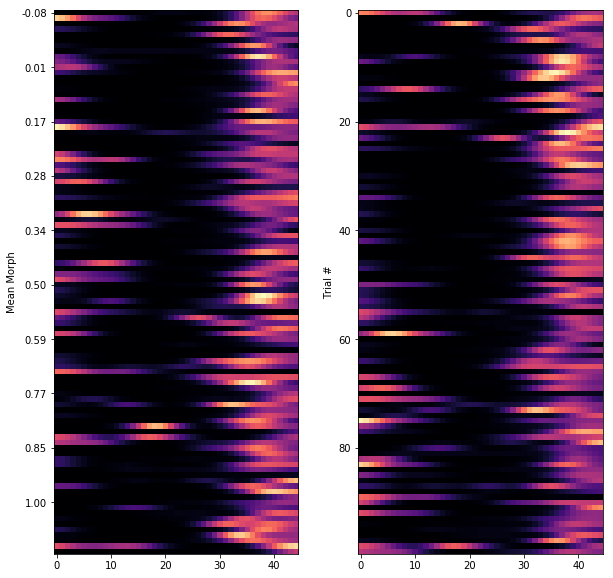

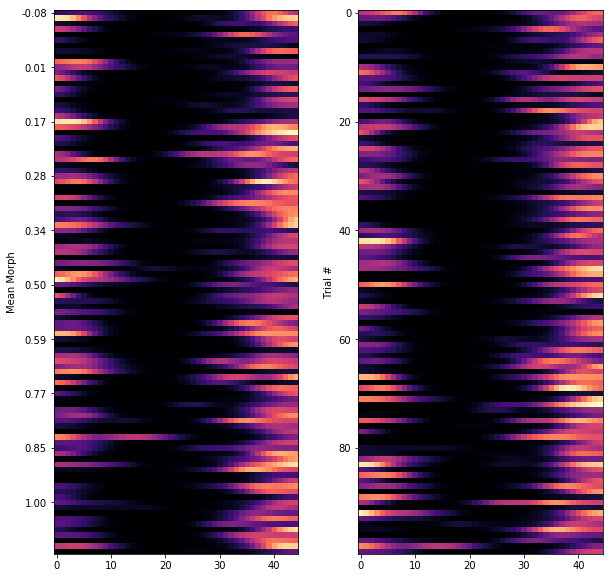

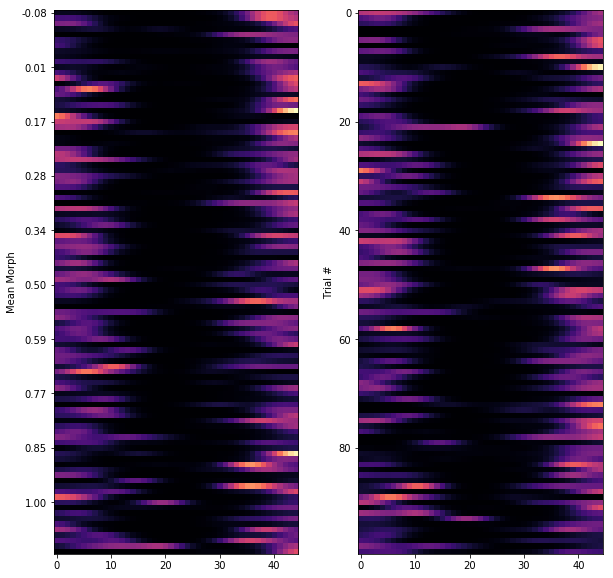

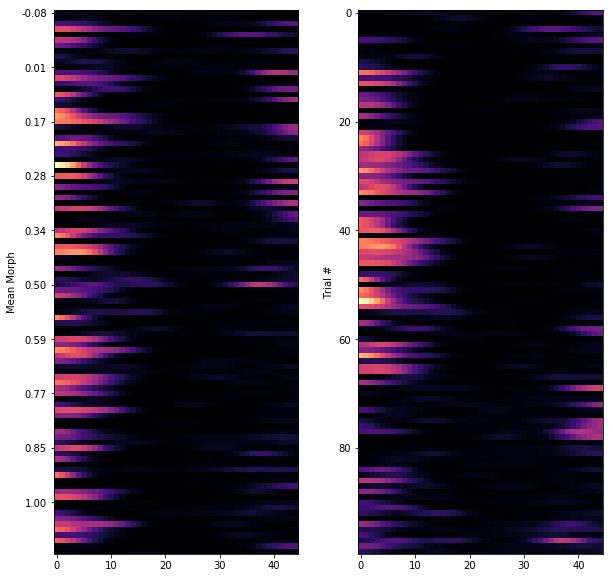

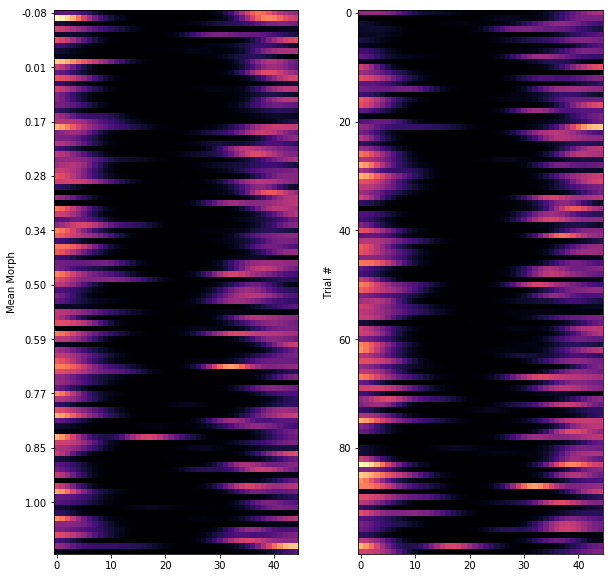

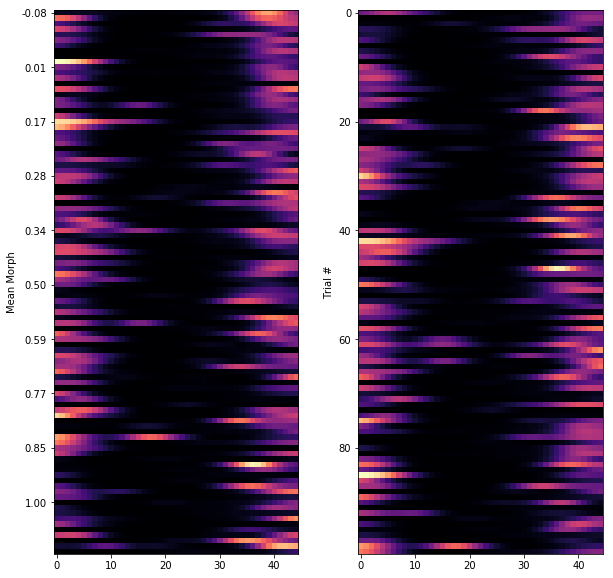

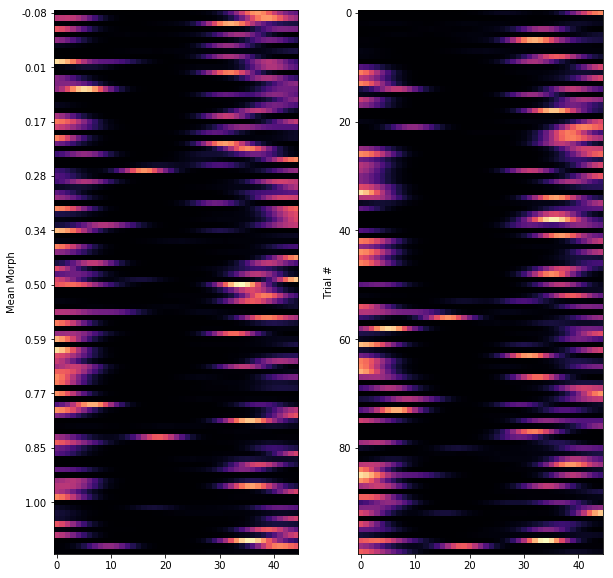

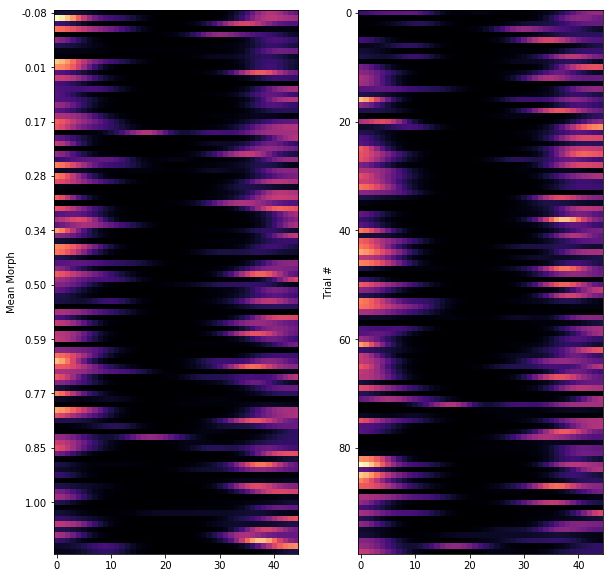

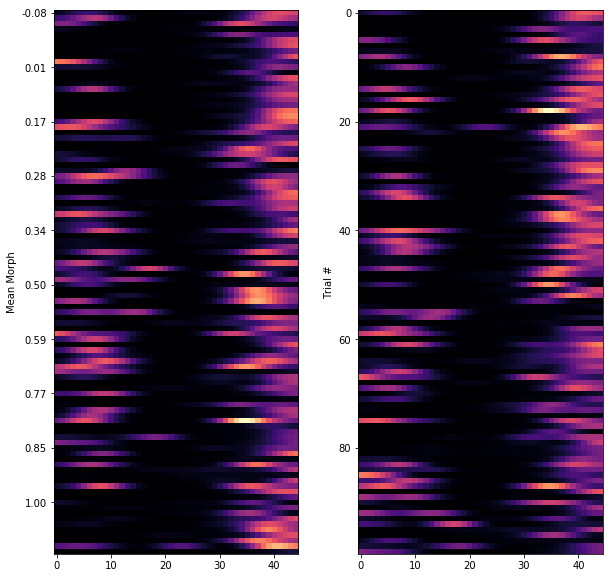

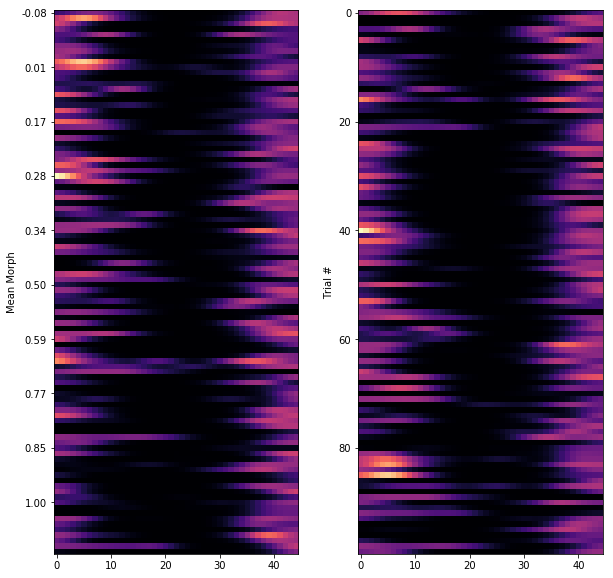

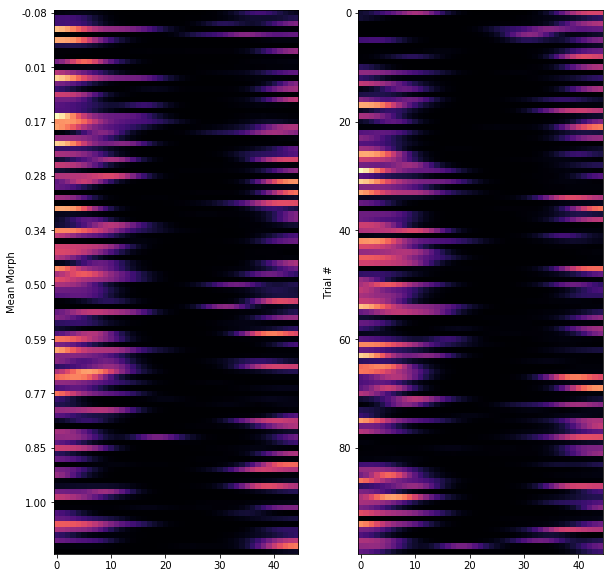

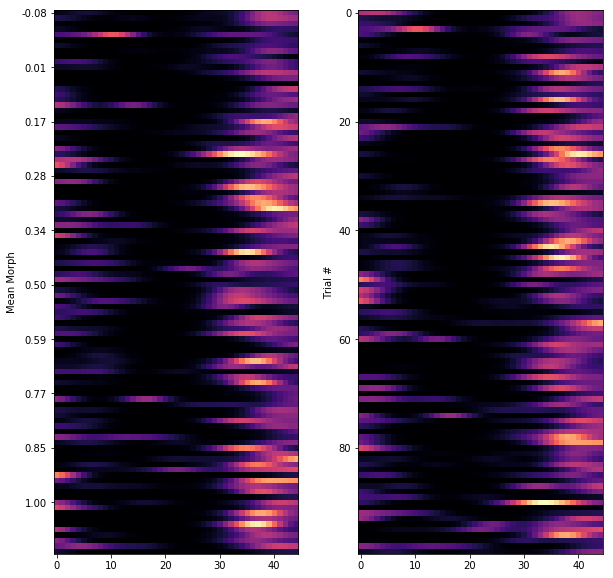

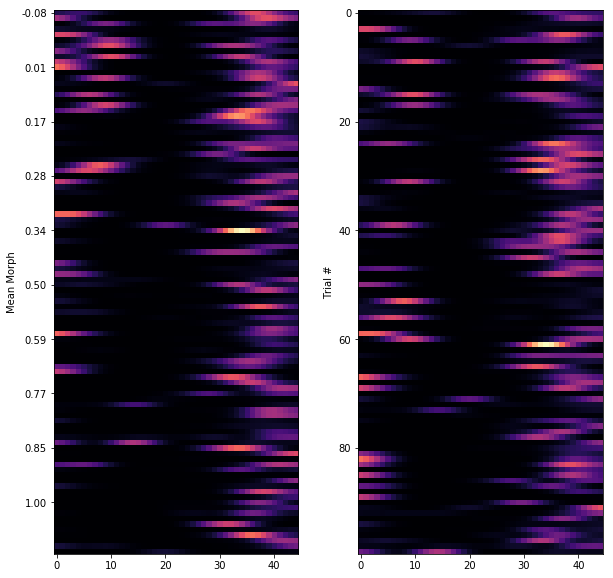

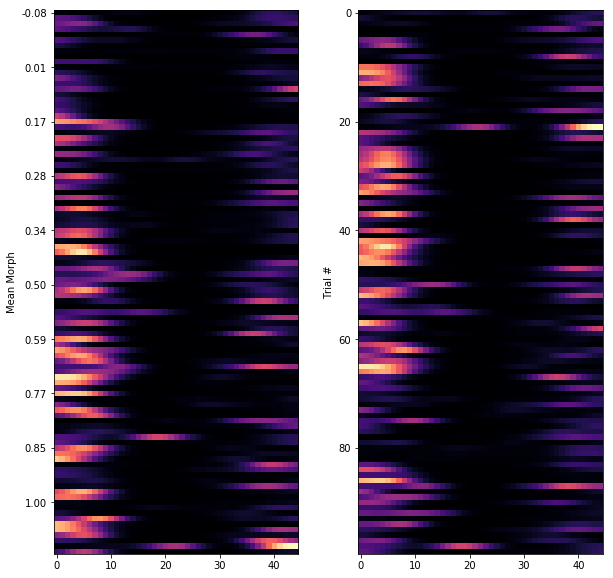

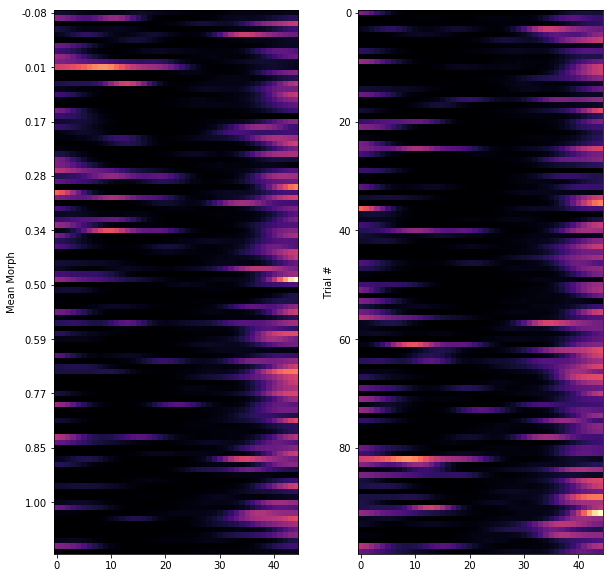

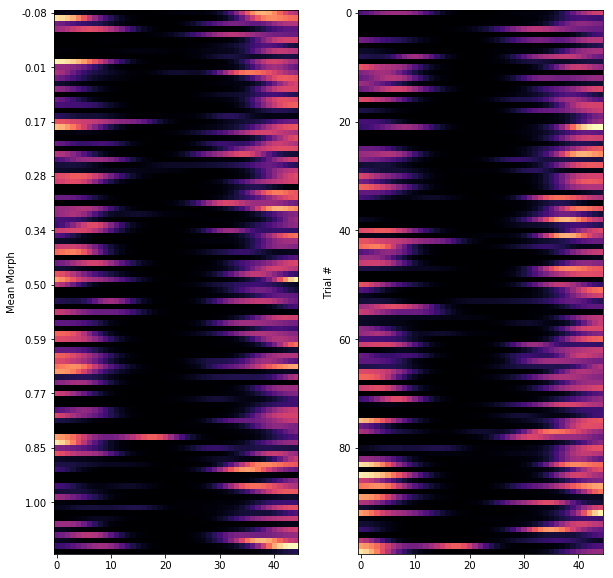

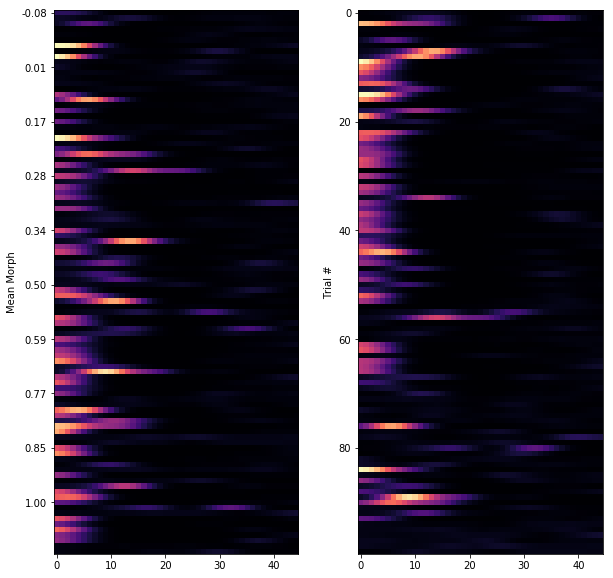

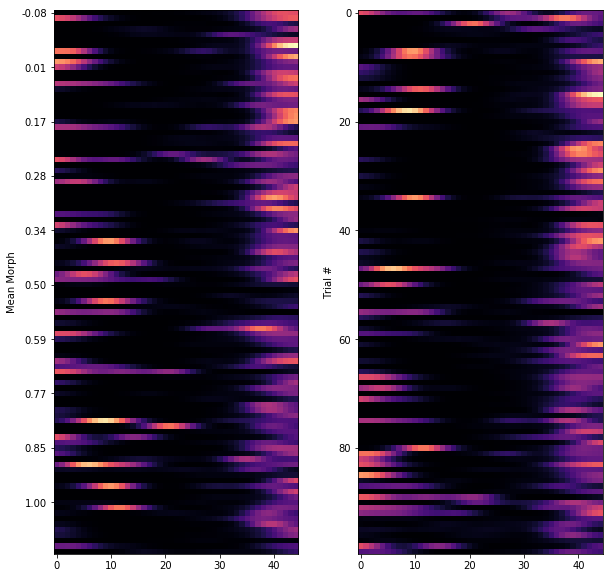

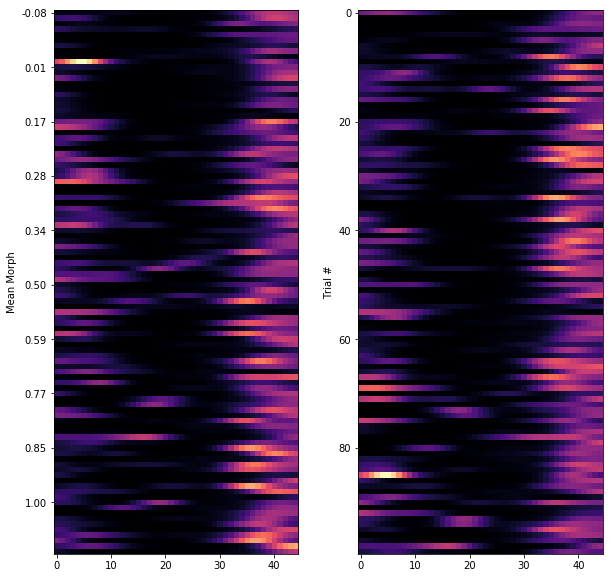

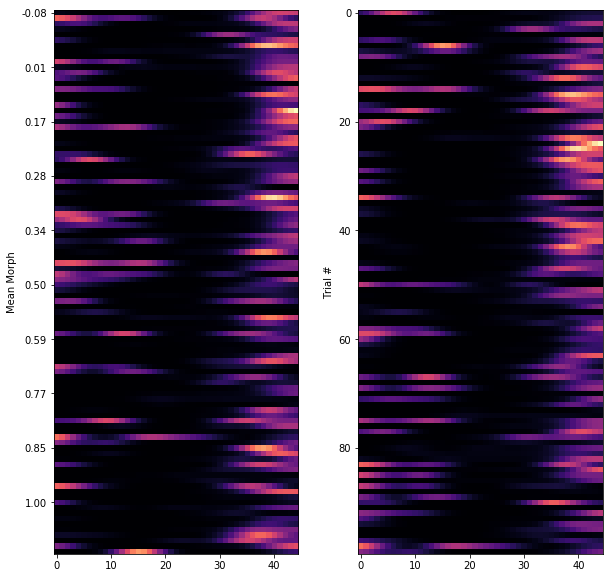

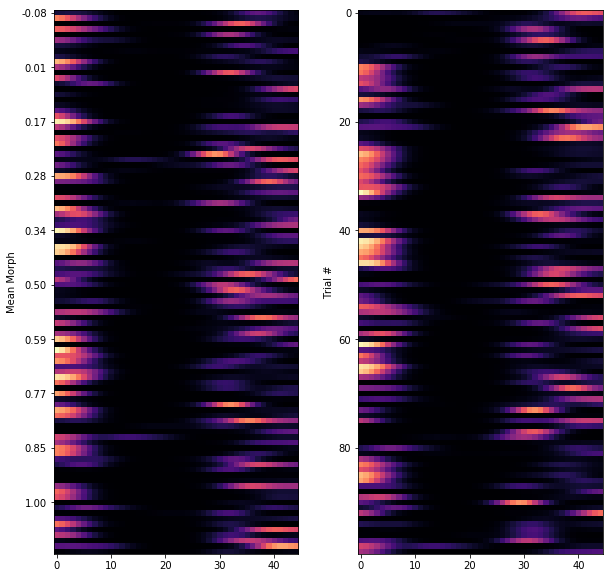

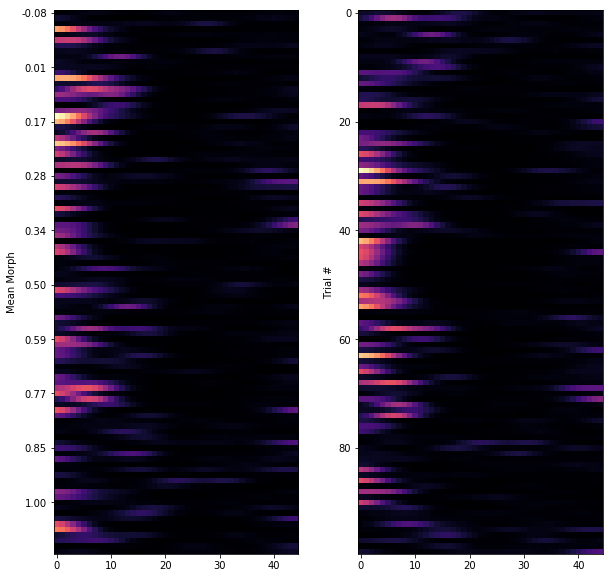

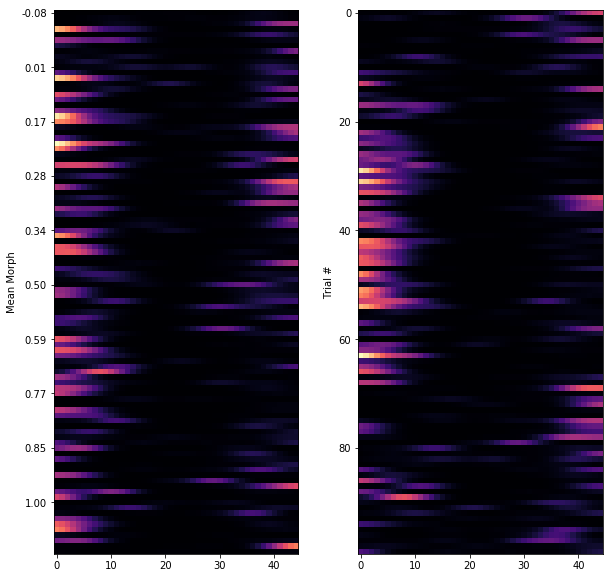

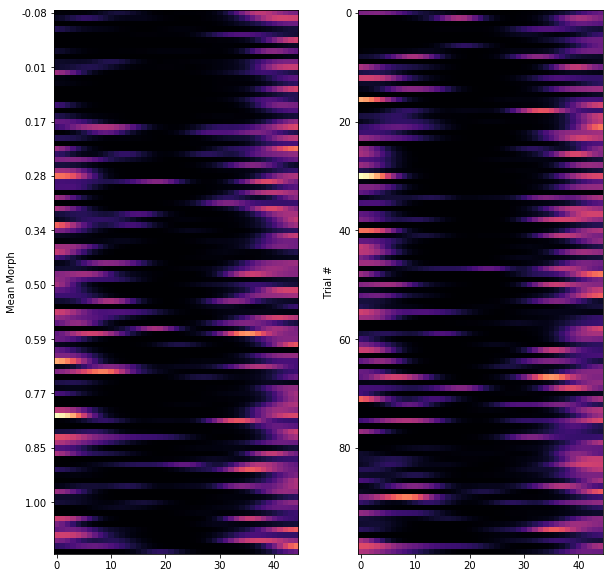

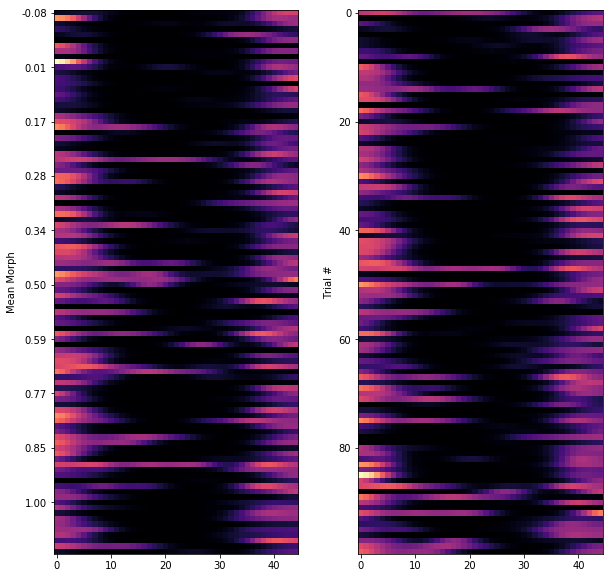

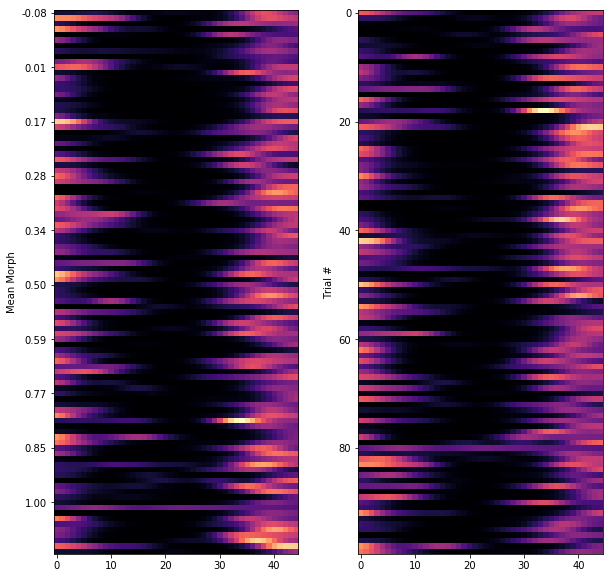

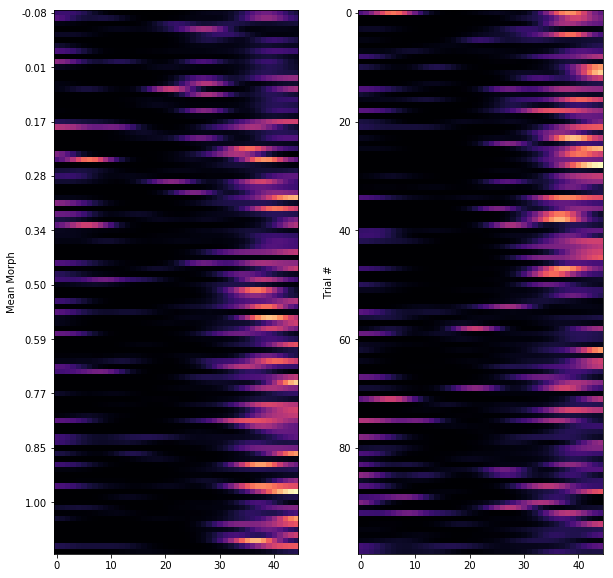

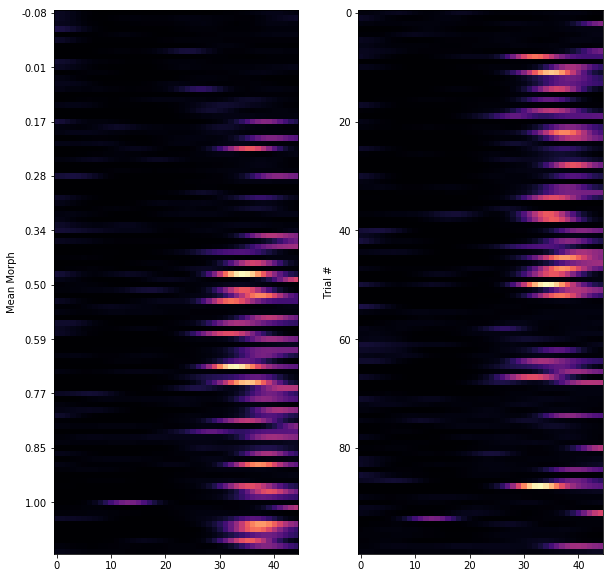

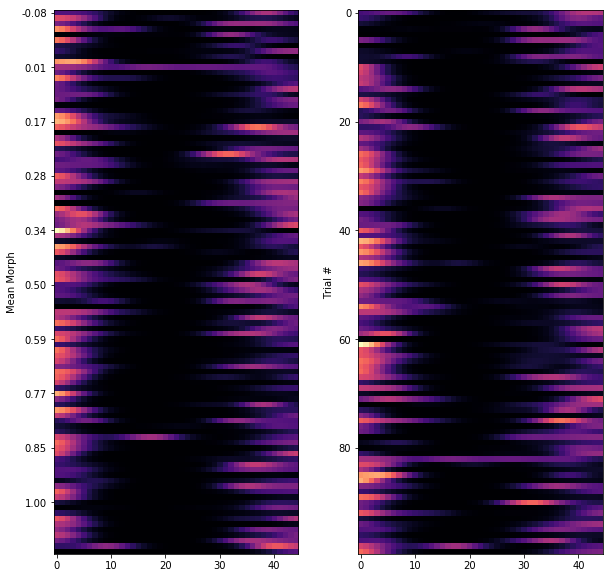

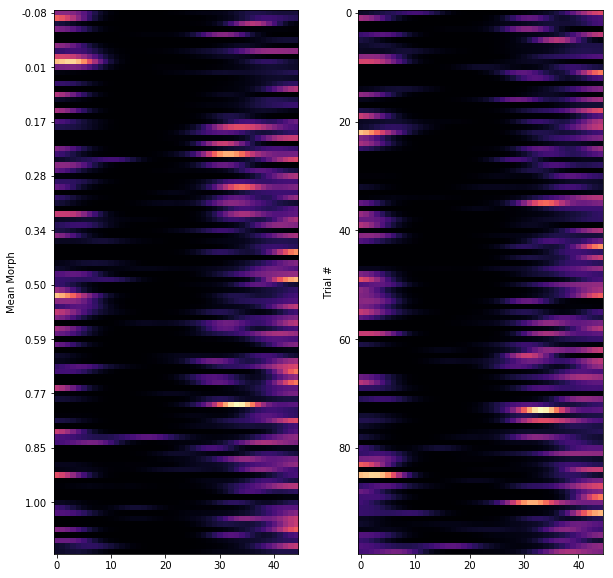

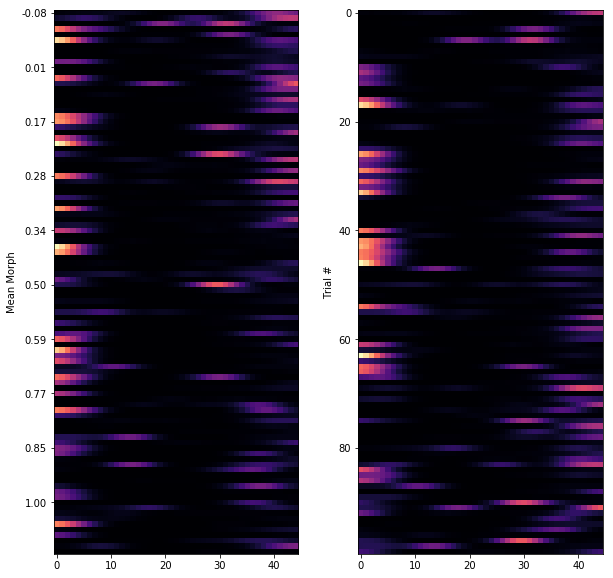

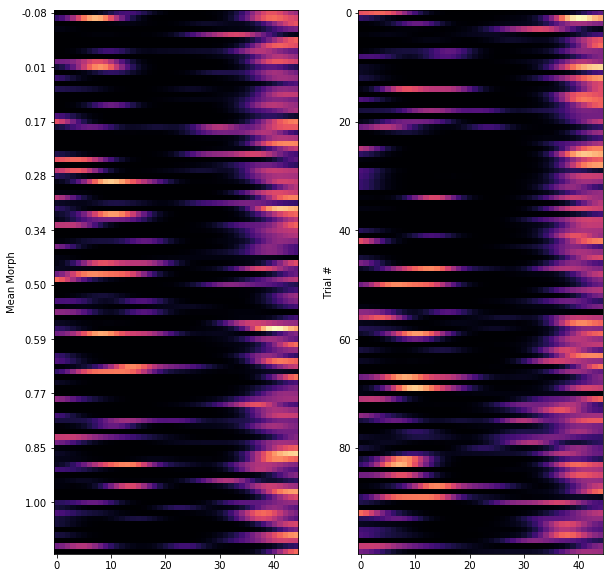

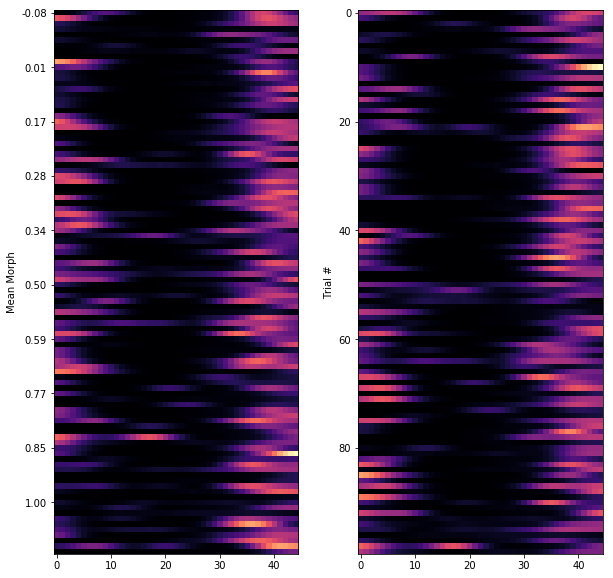

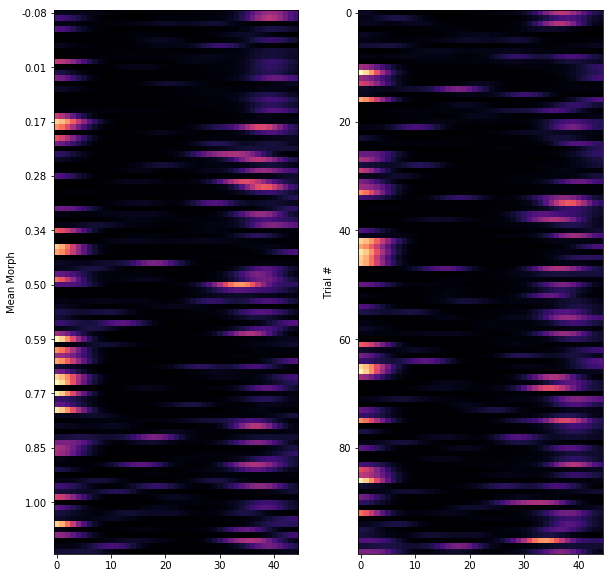

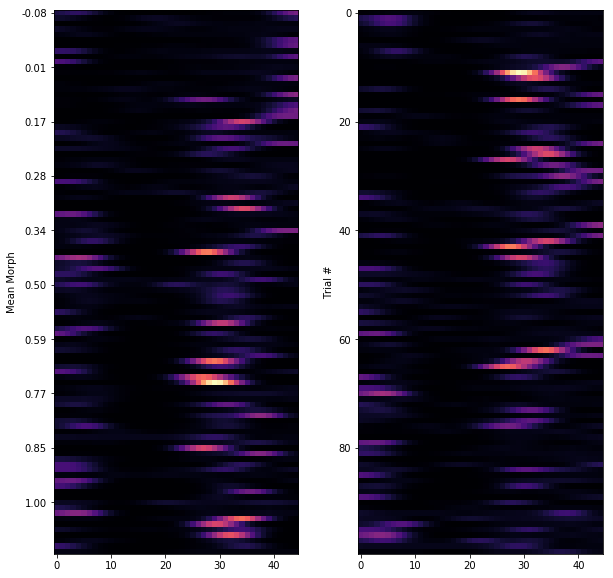

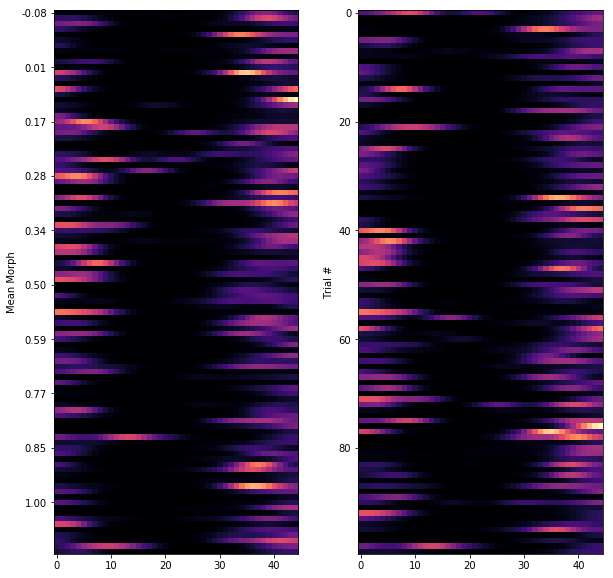

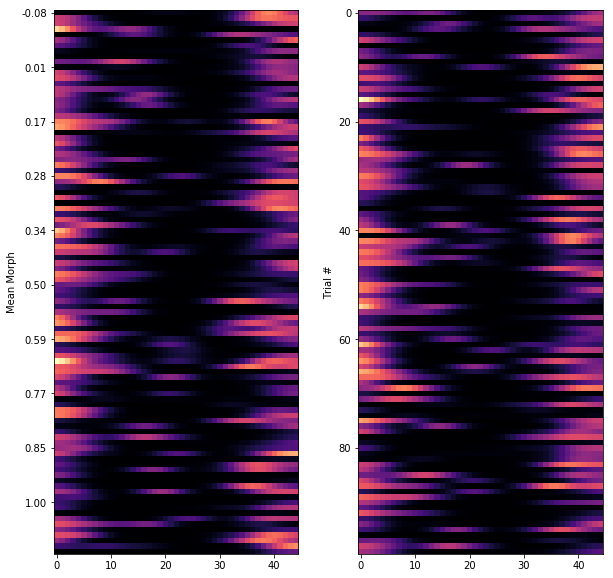

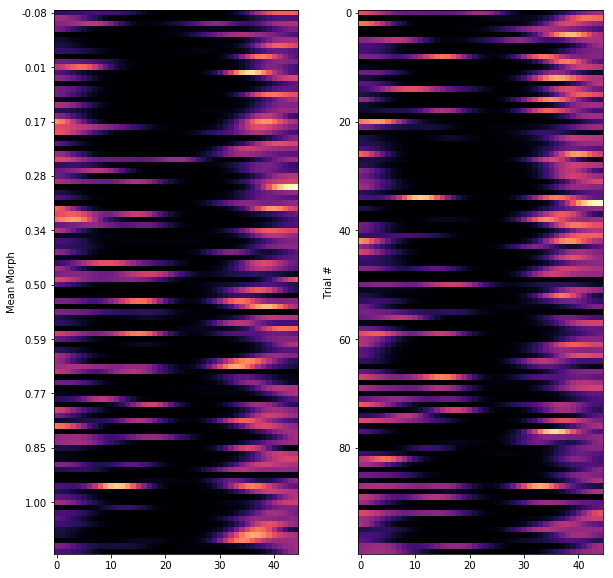

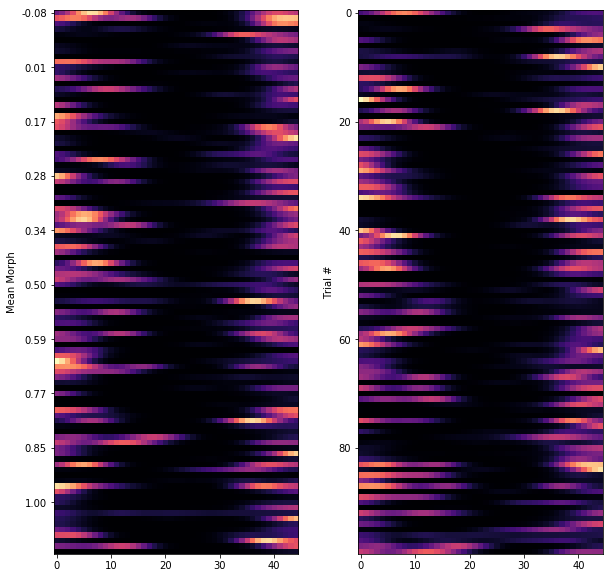

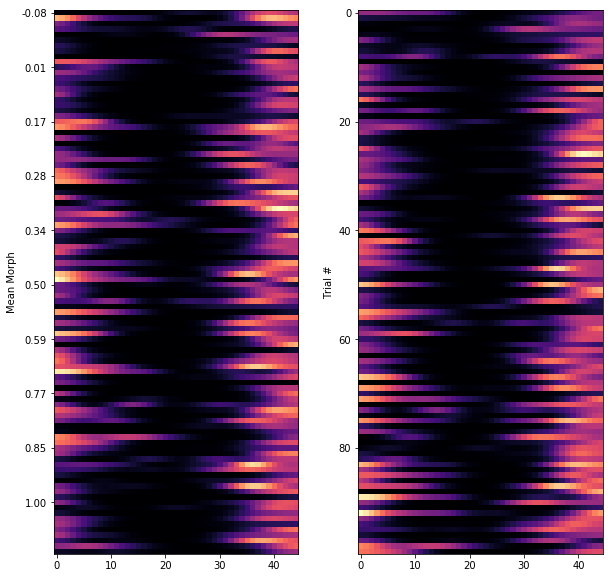

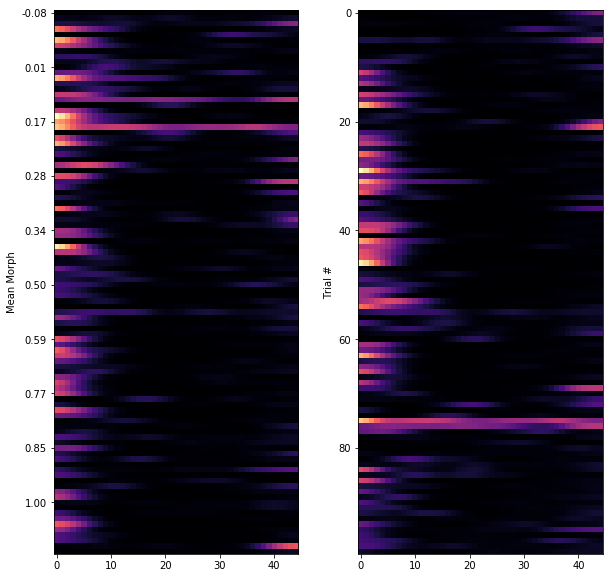

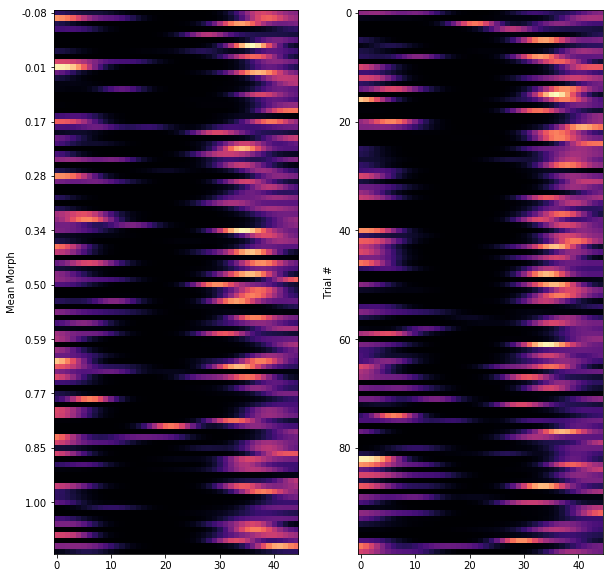

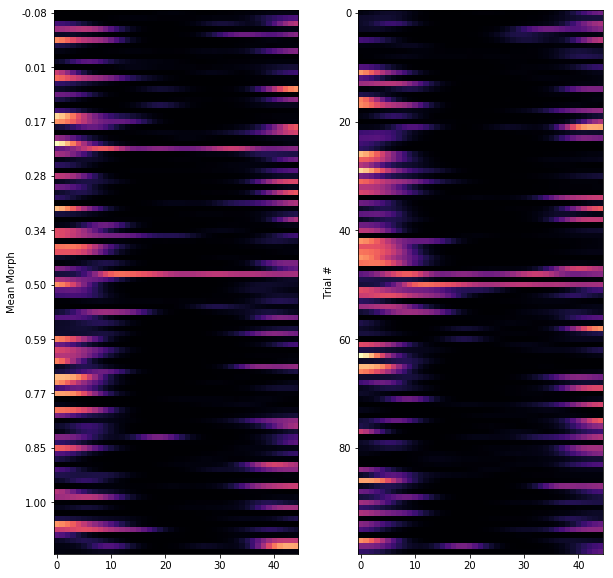

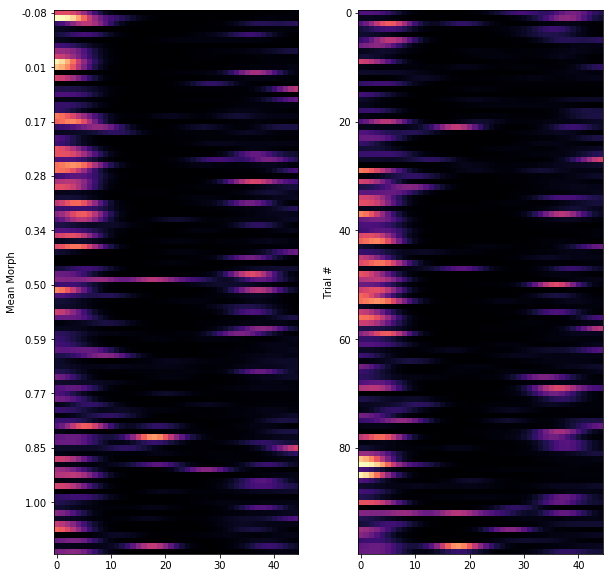

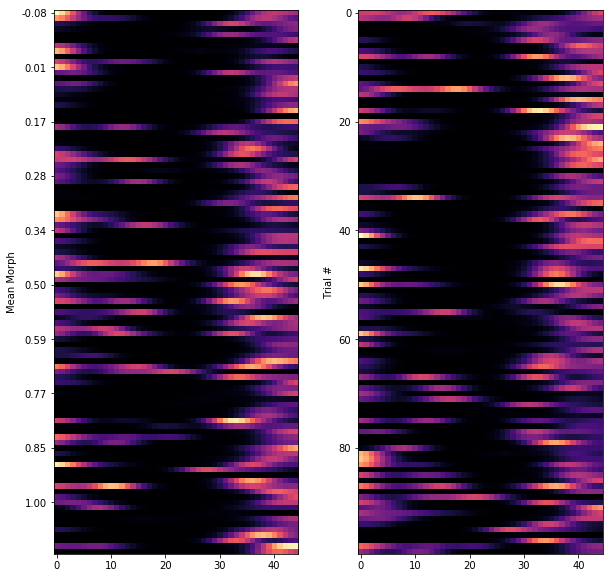

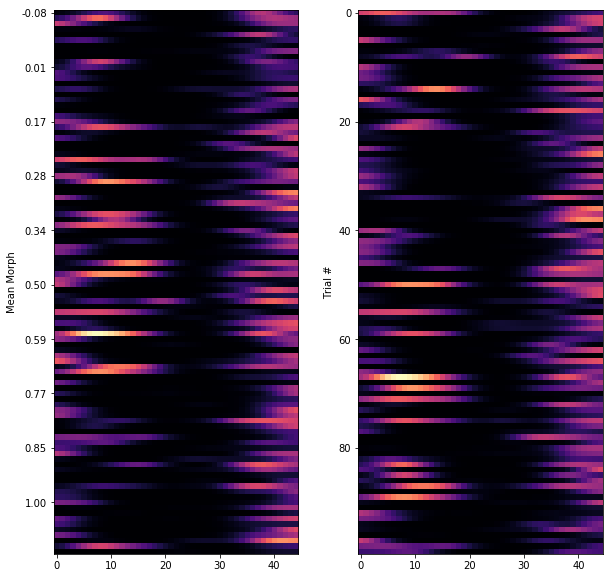

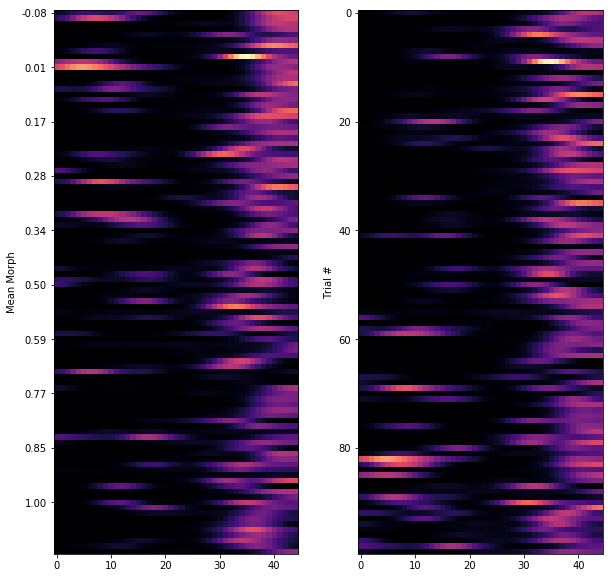

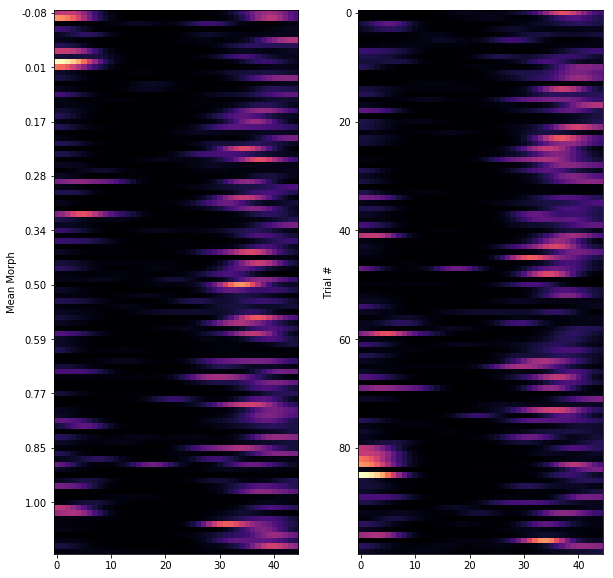

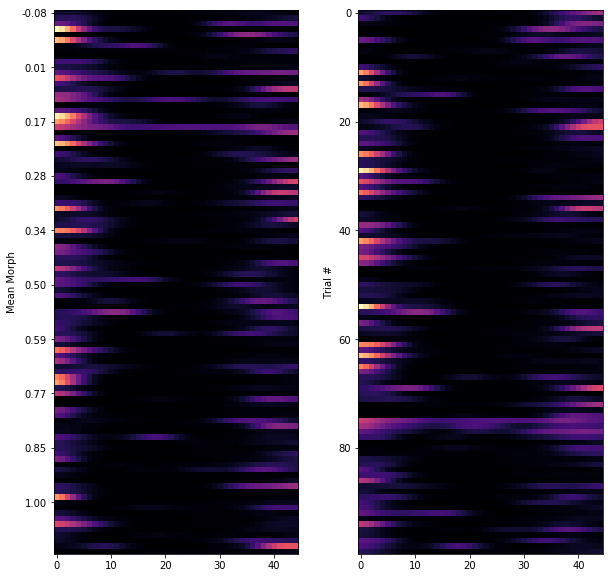

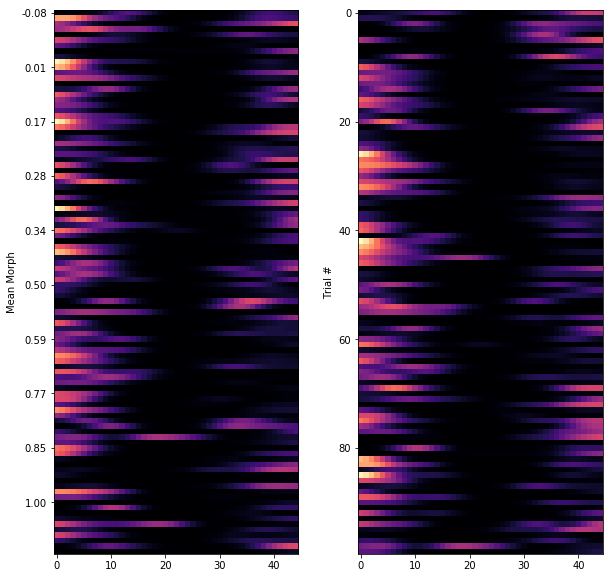

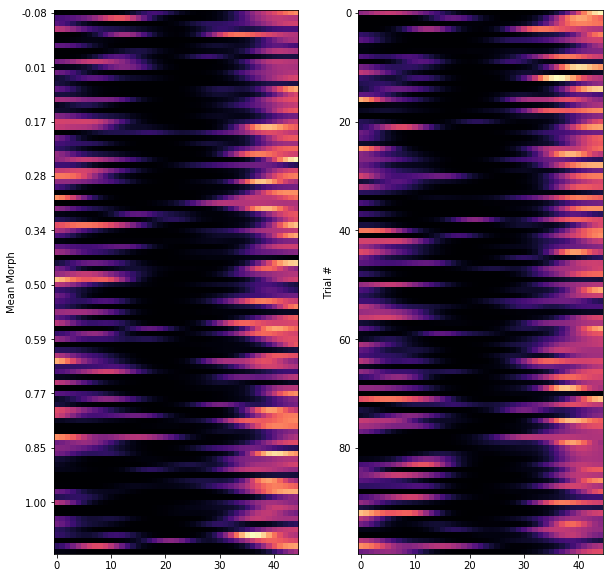

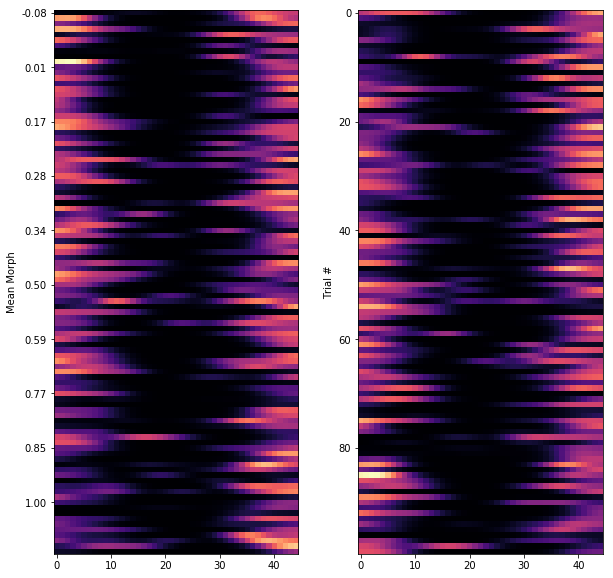

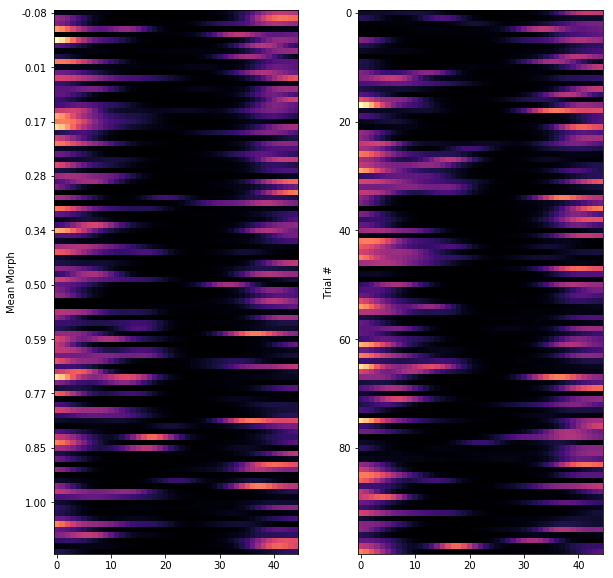

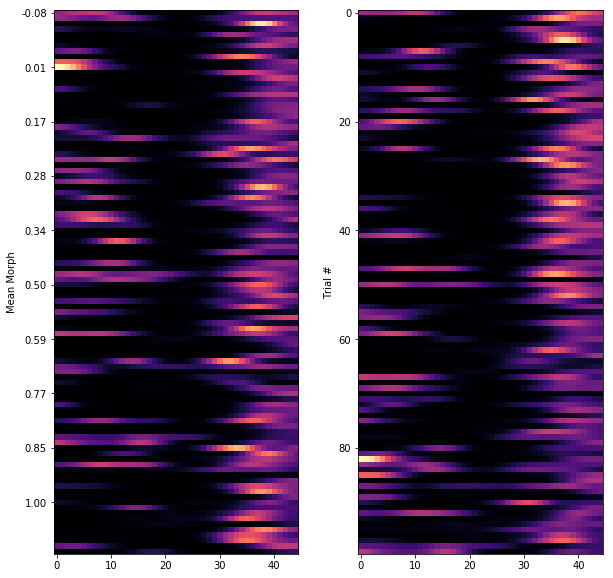

In [68]:
for i,o in enumerate(order[:100].tolist()):
    f,ax = plt.subplots(1,2,figsize=(10,10))
    S_i = np.copy(S_trial_mat[:,:,o])
    nan_inds = np.isnan(S_i)
    S_i_nanless = np.copy(S_i)
    S_i_nanless[nan_inds]=0
    One = np.ones(S_i.shape)
    One[nan_inds]=.001
    S_i_nanless= filters.gaussian_filter(S_i_nanless,[0,3])
    One = filters.gaussian_filter(One,[0,3])
    S_i = S_i_nanless/One
    S_i[nan_inds]=np.nan
    S_i/=np.nanmean(S_i.ravel())
    ax[0].imshow(S_i[morph_sort,:],cmap='magma') 
    ax[1].imshow(S_i,cmap='magma') 
    tick_inds = np.arange(0,S_i.shape[0],10)
    ax[0].set_yticks(tick_inds)
    tick_labels = ["%.2f" % effmorph_s[i] for i in tick_inds]
    ax[0].set_yticklabels(tick_labels)
    ax[0].set_ylabel('Mean Morph')
    ax[1].set_ylabel('Trial #')

